# 1. 데이터 이해 (탐색적 데이터 분석) - EDA

In [1]:
import pandas as pd
import numpy as np

trn = pd.read_csv('train.csv', na_values=['-1','-1.0'])  # 트레이닝셋
tst = pd.read_csv('test.csv', na_values=['-1','-1.0'])   # 테스트셋

print(trn.shape, tst.shape)

# 트레이닝 데이터셋에는 59만 명 데이터 확보,   테스트 데이터셋에는 89만명 데이터 확보

# 테스트데이터에는 운전자의 보험 청구 여부를 나타내는 'target'변수를 포함하고 있지 않아서, 훈련 데이터보다 변수가 하나 적은 58개임.

#### 그렇다면, 내 과제에서는 기한이익상실여부를 제외한 데이터를 테스트데이터 셋으로 활용 가능할 것.
##### 그래서 50대 50으로 나눠서 하라는 얘기를 했군.

(595212, 59) (892816, 58)


In [2]:
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
trn.info()   
# 모든 것들이 수치형으로 되어 있음. 그리고 익명화 되어 있음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

# 익명화된 변수명을 통해 변수의 형태를 짐작할 수 있다. '_bin' 형태는 이진변수. '_cat' 형태는 범주형 변수, -1'은 결측값(NaN).

In [4]:
# 이번 경진대회에서 예측해야 할 타겟 변수('target')의 분포 살펴보기
np.unique(trn['target'])  # 0과 1로 분포되어 있음을 확인

array([0, 1], dtype=int64)

In [5]:
1.0 * sum(trn['target'])/trn.shape[0]    # 전체 데이터 중 3.6%의 운전자가 보험 청구를 진행함. 즉, (전체 데이터 기준 타겟 변수의 비율은 3.6%)

0.036447517859182946

In [6]:
# 변수의 최대값, 최소값 확인 (반드시 써야 함)
trn.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# 변수의 결측값 확인(반드시 써야 함). 주요 피처에 결측값이 생길 시 제대로된 모델 구성이 불가능하다.
trn.isnull().sum(axis=0)

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [8]:
tst.isnull().sum(axis=0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


# 문제 특성상, 타겟 변수가 1일 확률이 매우 낮은 불균형한 데이터이다.

# 내 논문 주제랑 비슷한 것이구나.

## 시각화로 데이터 살펴보기

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# 주피터노트북 내부에 그래프를 출력하도록 설정

In [10]:
# 다음 변수명들을 일일이 대입하여 (;;;) 막대 그래프를 그려본다.

# 데이터 타입 기준으로 1) 이진 변수, 2) 범주형 변수, 3) 정수형 변수, 4) 소수형 변수     그룹으로 나눌 수 있다.
binary = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 
          'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
# 범주형 변수
category = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
            'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
            'ps_car_10_cat', 'ps_car_11_cat']
# 정수형 변수
integer = ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 
           'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 
           'ps_calc_14', 'ps_car_11']
# 소수형 변수
floats = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

## 데이터 시각화를 위해 훈련 데이터와 테스트 데이터를 단일 데이터로 통합힌다.

In [11]:
# 테스트 데이터의 'target' 변수를 결측값으로 설정
tst['target'] = np.nan  # 실제로 테스트데이터셋에는 target이 없다.

# 통합 변수 df 생성
df = pd.concat([trn, tst], axis=0)

C:\Users\fu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [12]:
print(df.shape)   # 새로 합쳐진 것의 피처 개수 확인

(1488028, 59)


In [13]:
df.isnull().sum(axis=0)

# target             892816 인 이유는, tst['target'] = np.nan으로 결측값으로 만들었기 때문

id                      0
ps_calc_01              0
ps_calc_02              0
ps_calc_03              0
ps_calc_04              0
ps_calc_05              0
ps_calc_06              0
ps_calc_07              0
ps_calc_08              0
ps_calc_09              0
ps_calc_10              0
ps_calc_11              0
ps_calc_12              0
ps_calc_13              0
ps_calc_14              0
ps_calc_15_bin          0
ps_calc_16_bin          0
ps_calc_17_bin          0
ps_calc_18_bin          0
ps_calc_19_bin          0
ps_calc_20_bin          0
ps_car_01_cat         267
ps_car_02_cat          10
ps_car_03_cat     1028142
ps_car_04_cat           0
ps_car_05_cat      666910
ps_car_06_cat           0
ps_car_07_cat       28820
ps_car_08_cat           0
ps_car_09_cat        1446
ps_car_10_cat           0
ps_car_11               6
ps_car_11_cat           0
ps_car_12               1
ps_car_13               0
ps_car_14          106425
ps_car_15               0
ps_ind_01               0
ps_ind_02_ca

## 각 변수 별 그래프화 (총 57개)

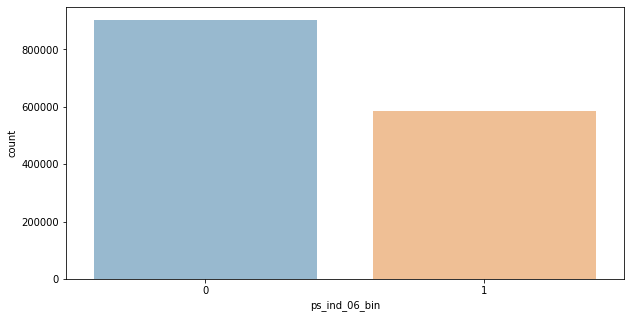

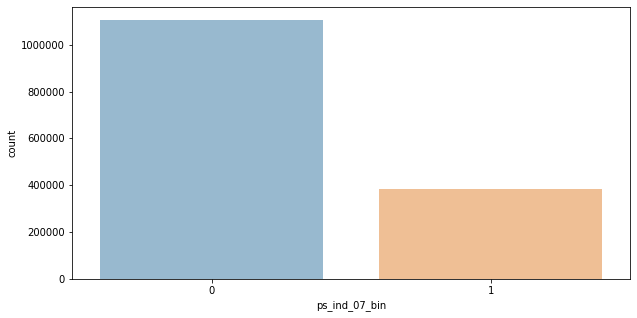

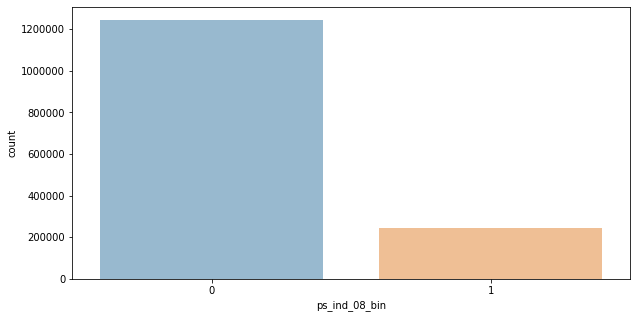

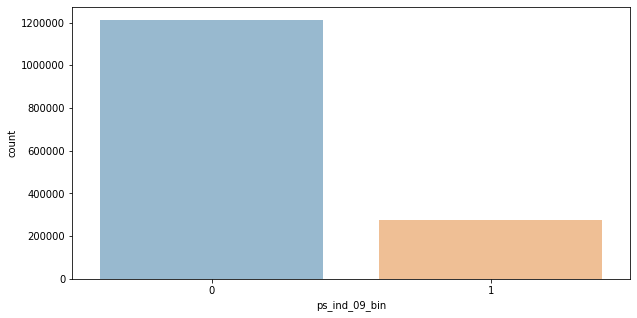

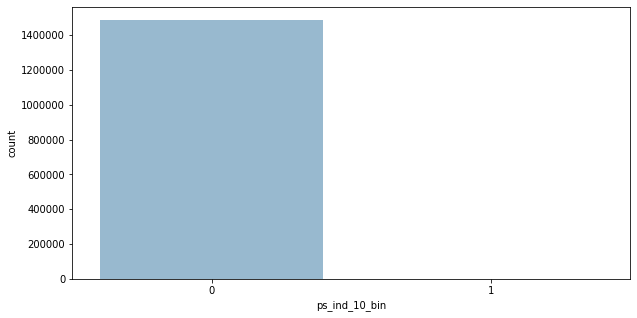

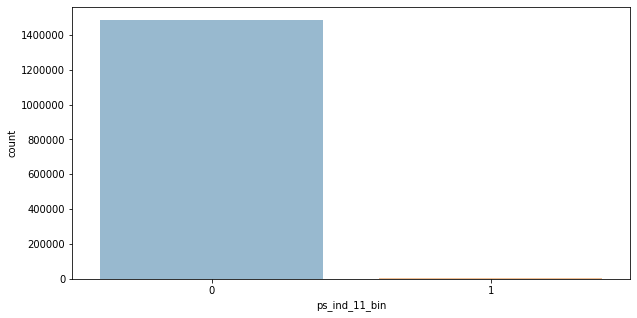

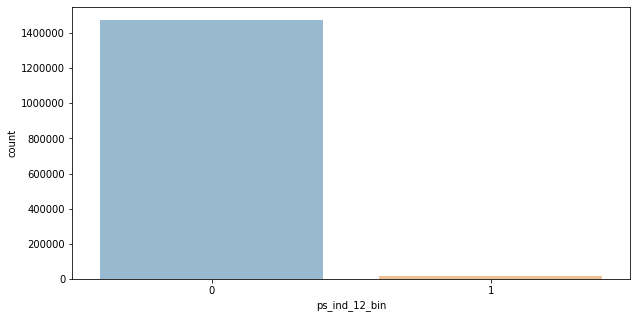

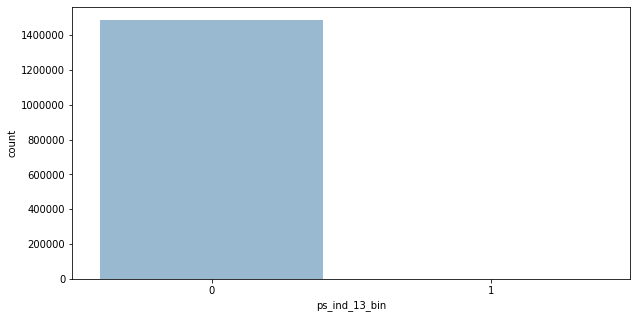

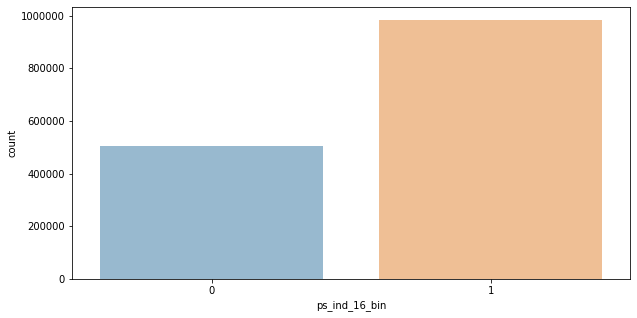

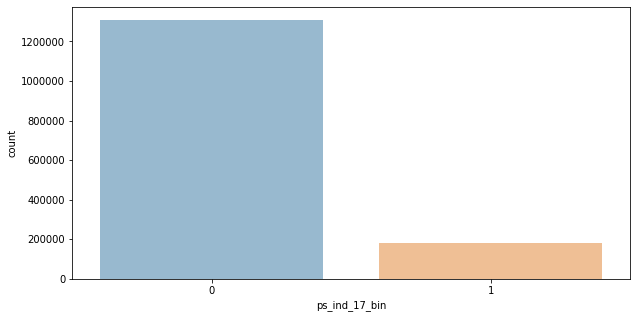

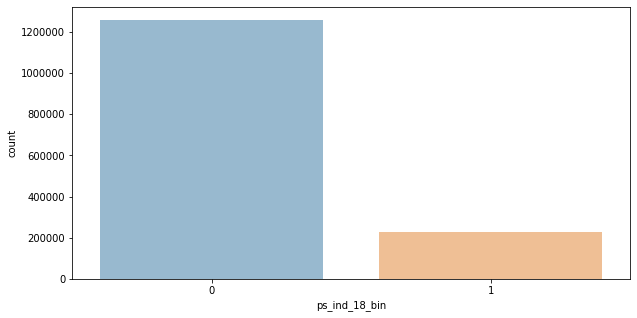

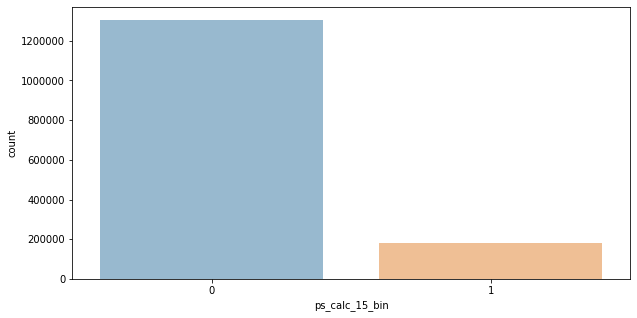

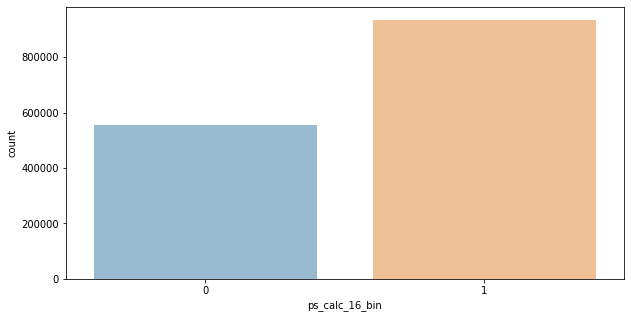

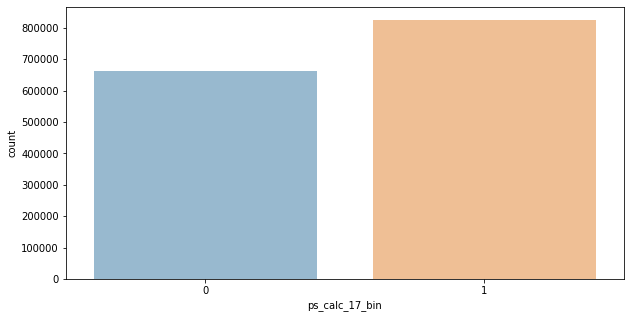

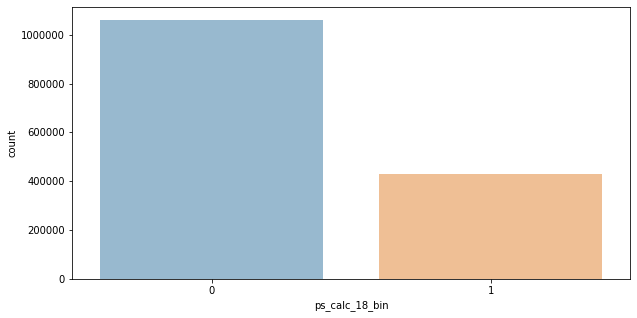

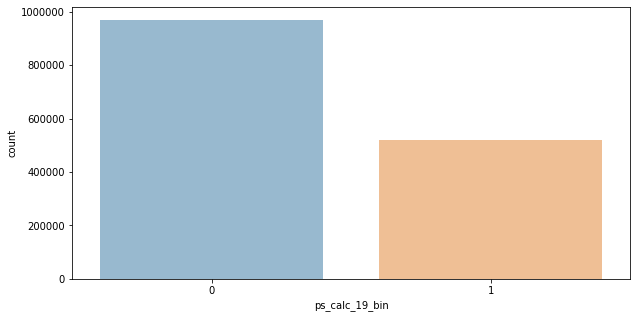

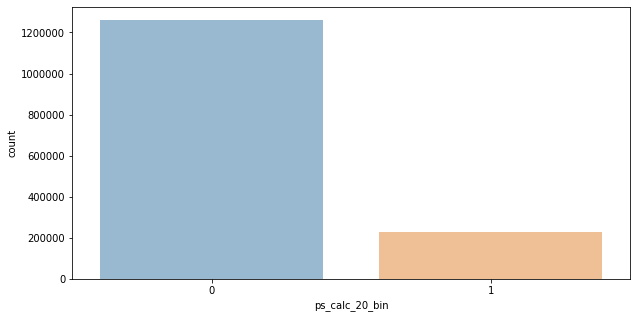

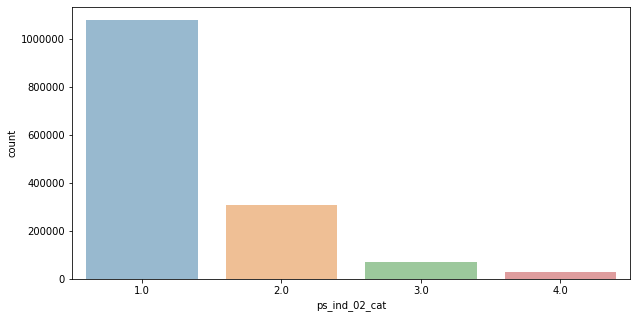

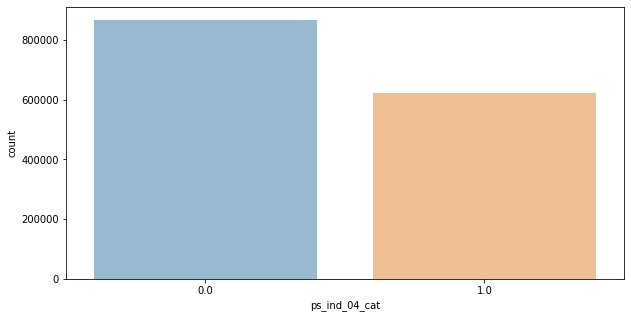

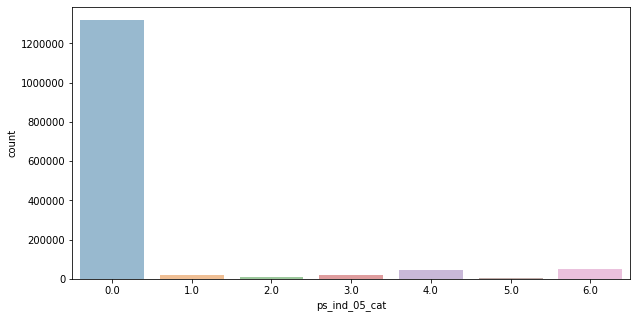

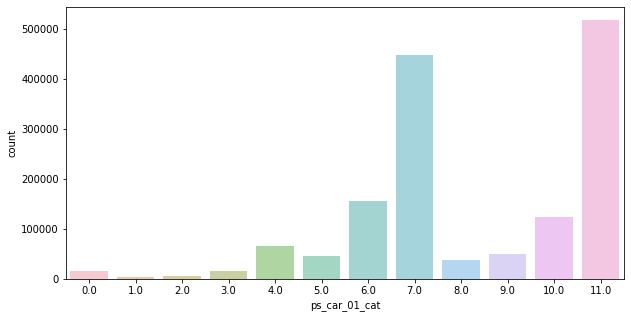

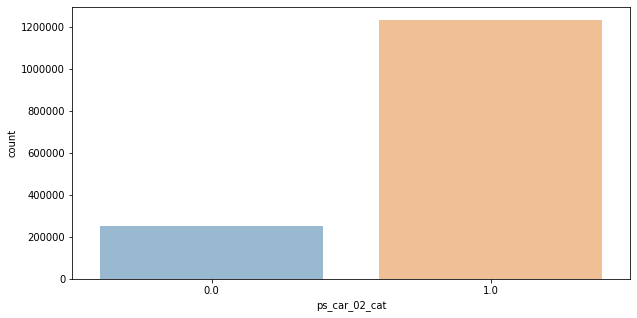

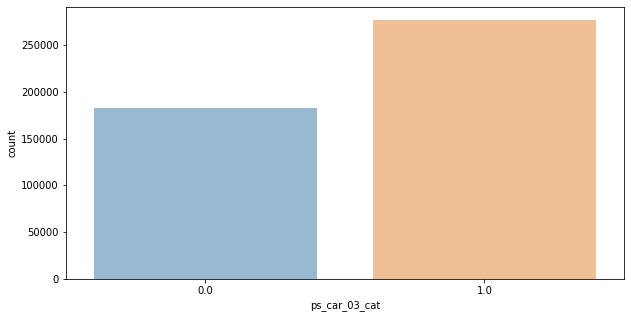

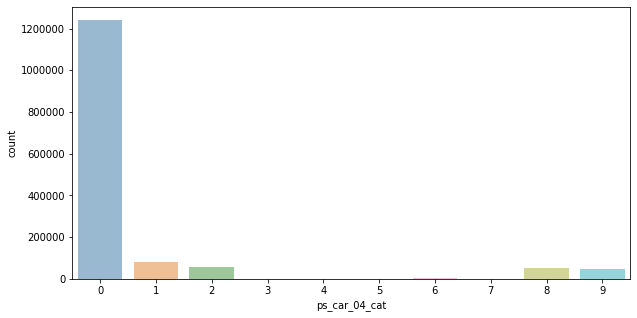

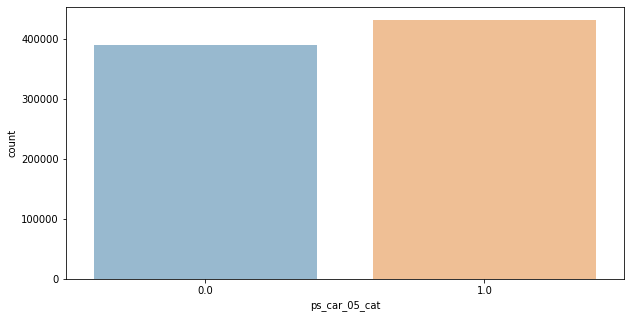

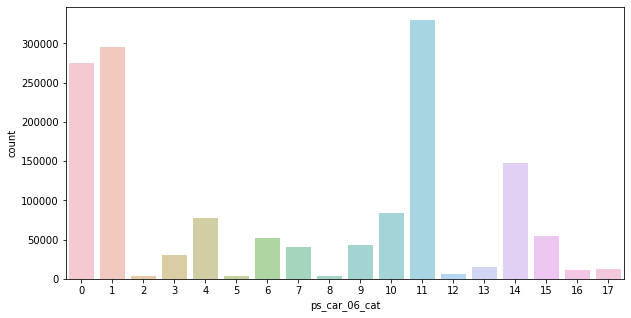

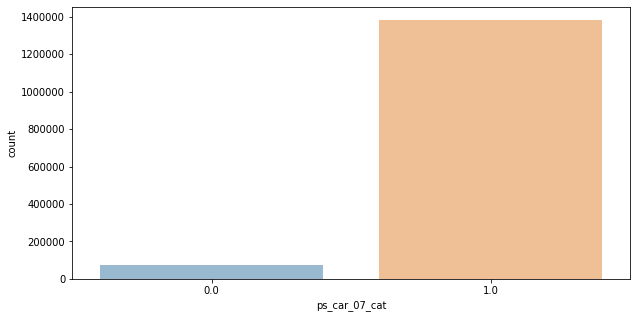

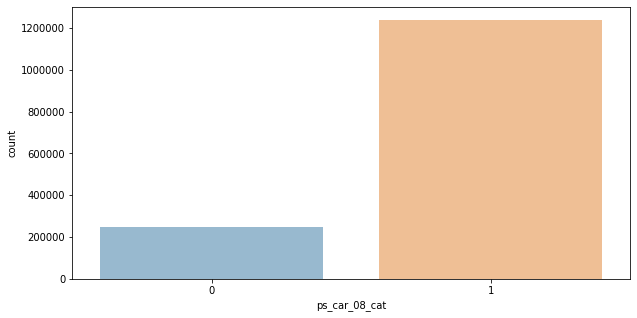

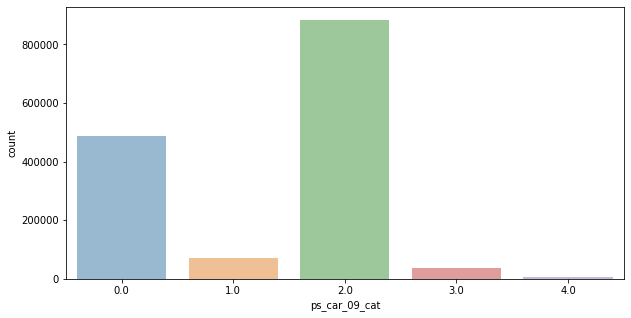

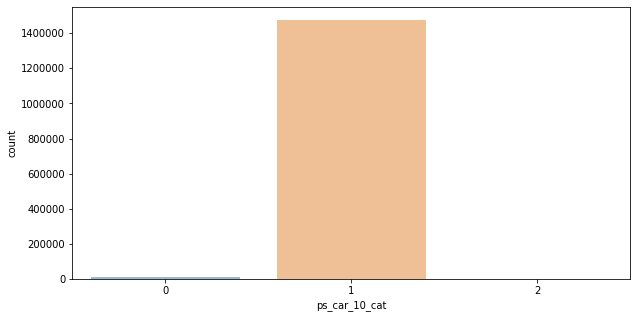

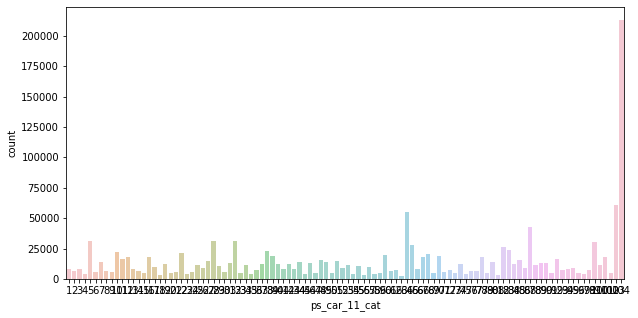

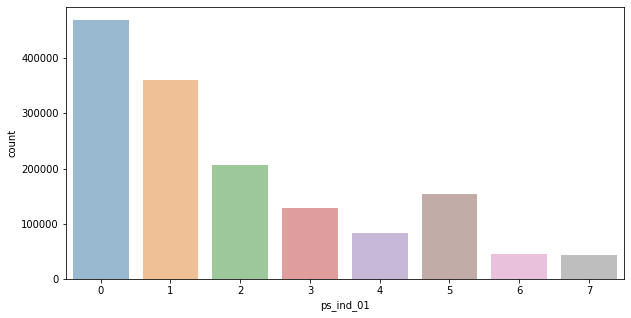

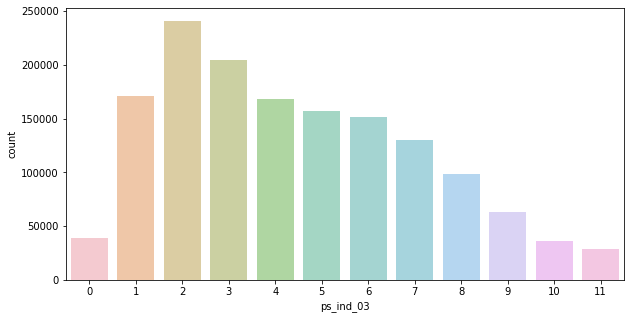

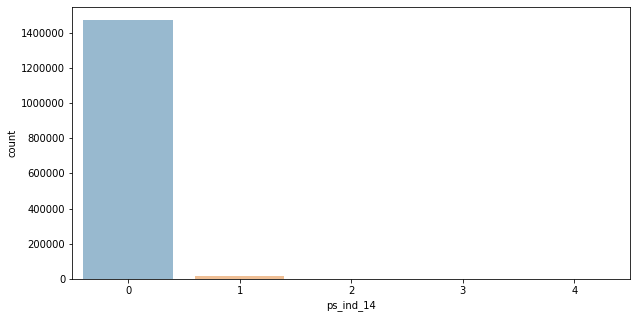

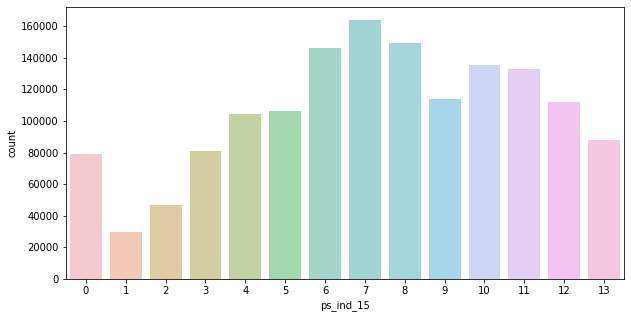

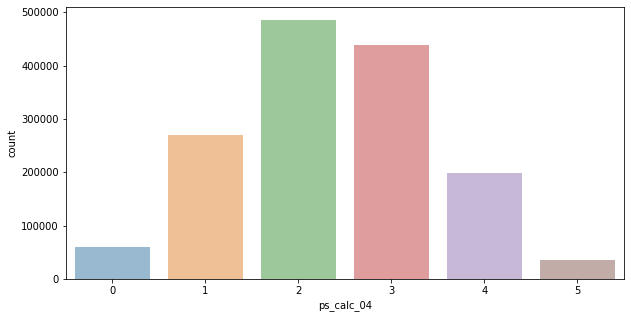

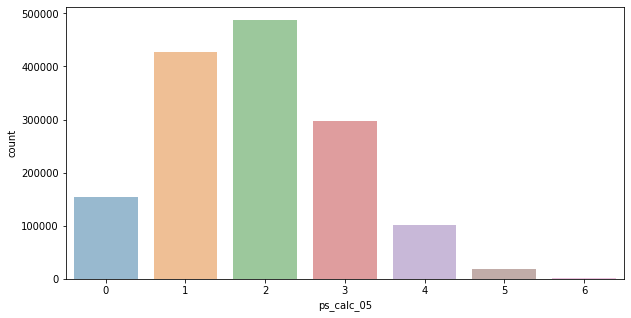

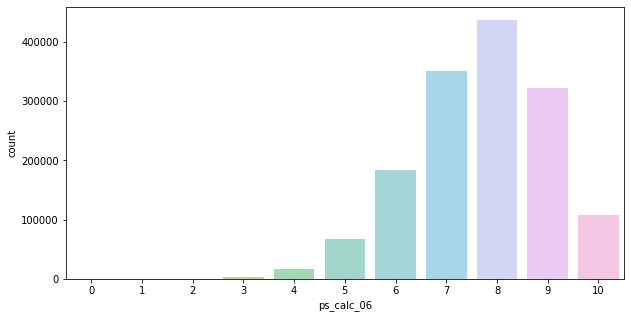

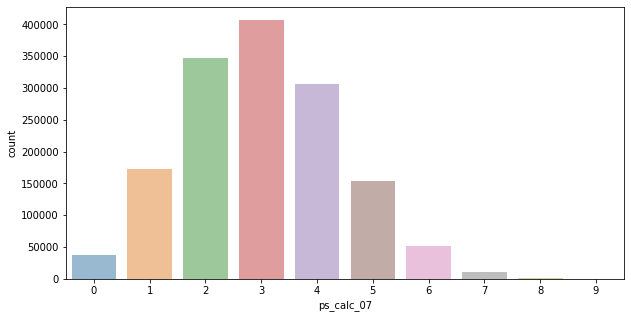

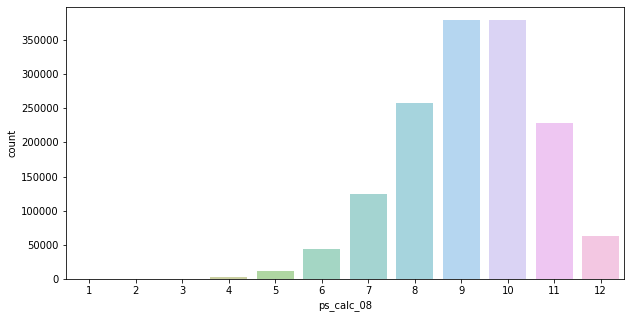

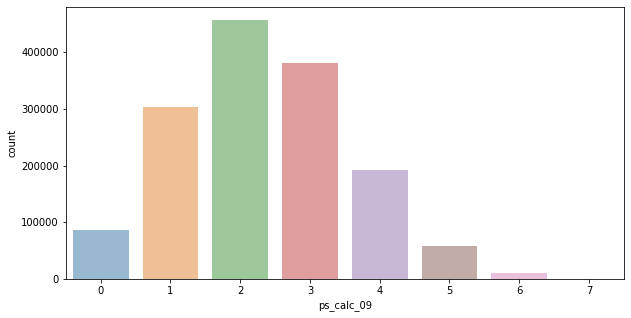

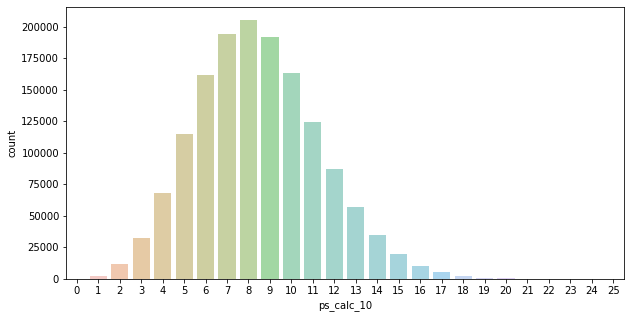

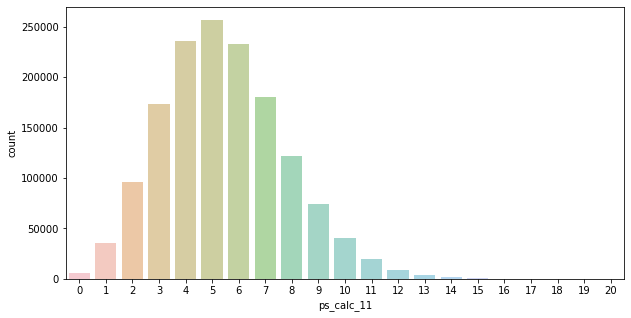

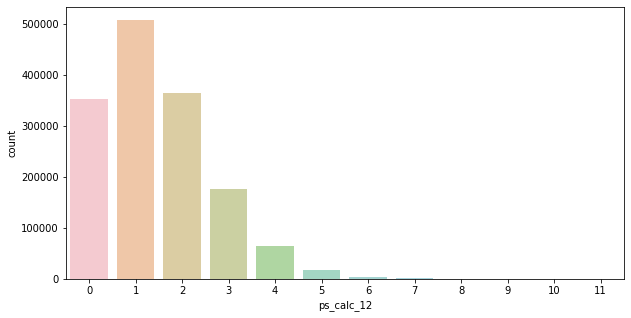

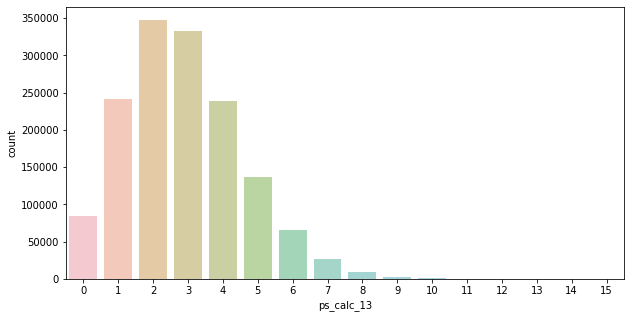

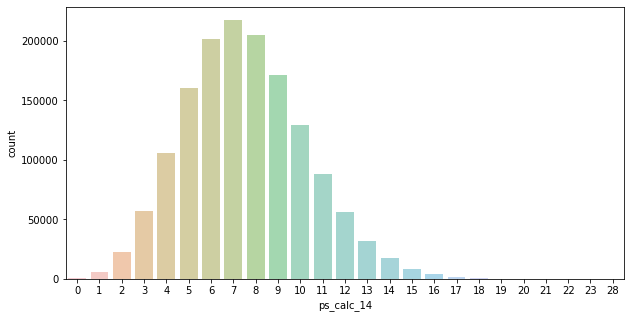

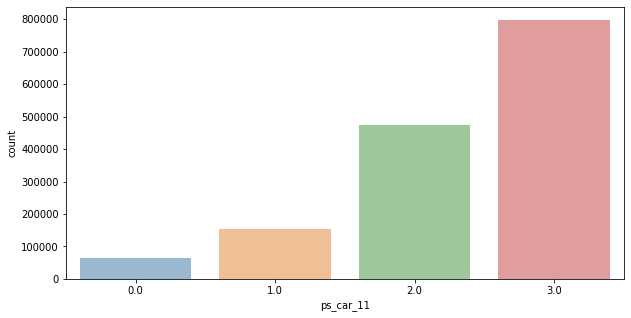

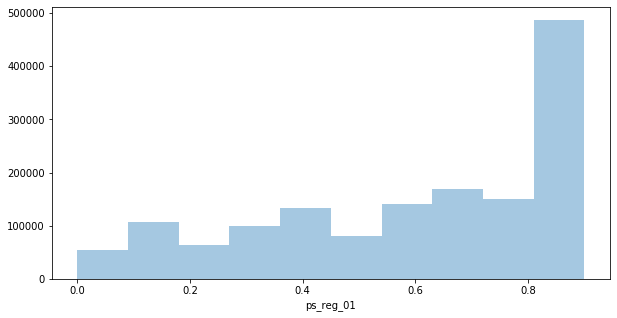

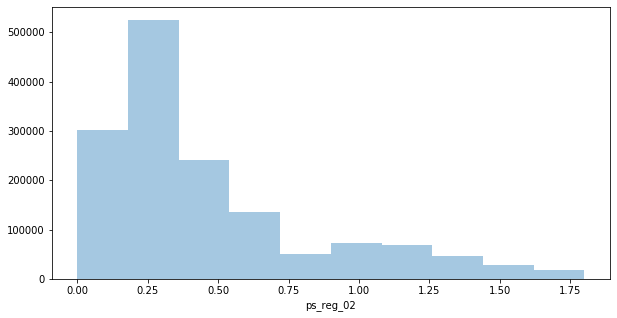

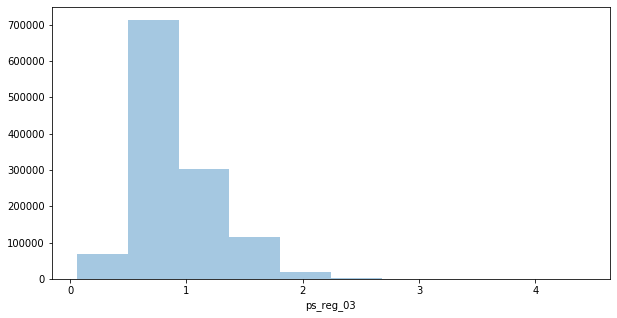

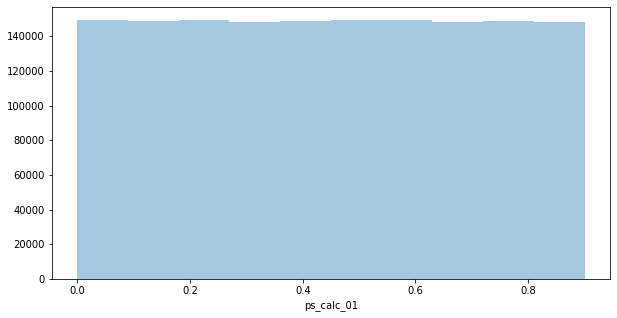

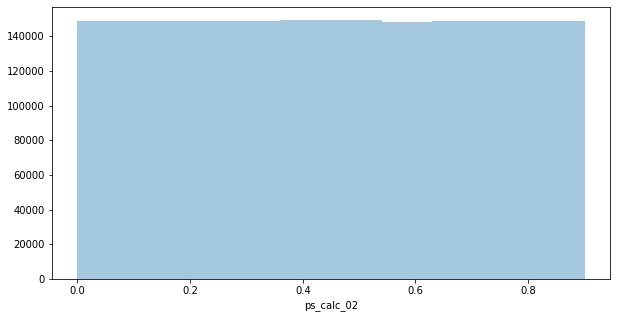

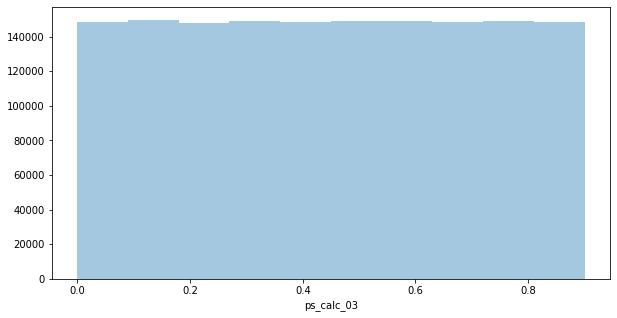

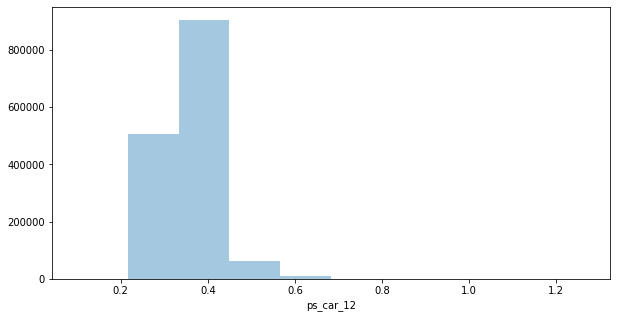

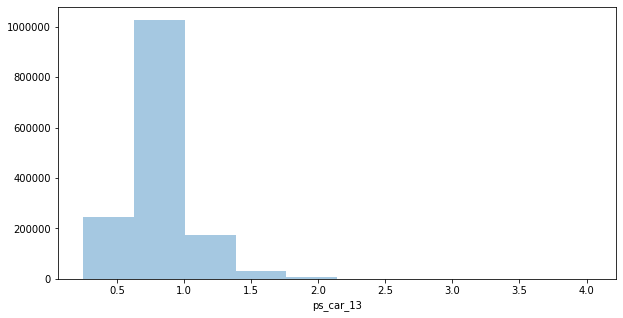

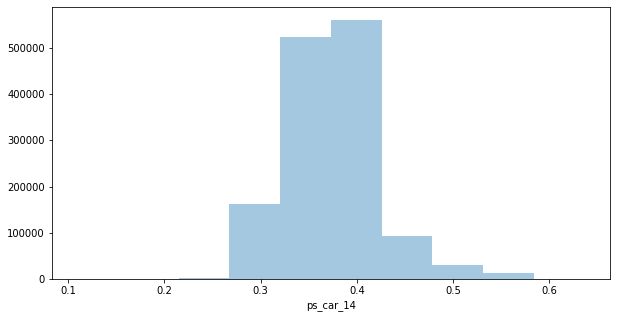

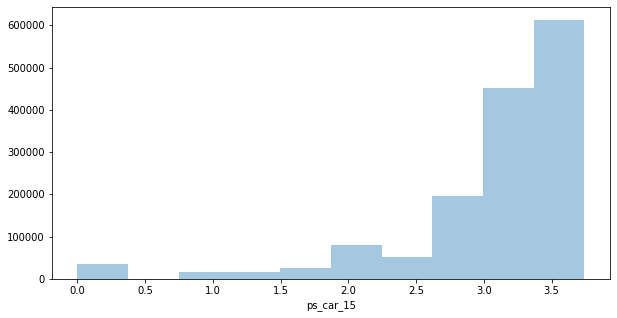

In [14]:
# 히스토그램 그래프 시각화
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()
    
def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)  # na를 drop이 설정되어 있다.
    plt.show()

# 위의 그룹화 한것을 기반으로 이진, 범주형, 정수형 변수 시각화
for col in binary + category + integer:
    bar_plot(col, df)

# 소수형 변수 시각화
for col in floats:
    dist_plot(col, df)
    
# 각 변수 57개에 대한 148만 건의 데이터를 포함한 그래프가 생성된다.

### 이진 변수중엔 0의 빈도가 압도적으로 많은것이 존재하고, 1과 0이 균형잡혀 있는 변수도 존재한다.
### 범주형 변수중엔, 고유값이 적게는 2개부터 100개 이상까지 존재한다.
### 정수형 변수중엔, ps_calc_06과 07이 정규분포를 보이고, 그 외 몇개는 한쪽으로 쏠려있는 분포를 보인다.
### 소수형 변수중엔, ps_calc_01과 02가 균등 분포를 보이고 있다. 그외 몇개는 한쪽으로 쏠려있는 분포를 보인다.

## 모든 데이터가 모델 학습에 유의미하지 않을 수 있다. 그러므로 변수 간 상관관계(Heatmap)를 파악한다.
 -> 특히, 상관관계가 너무 높은 두 변수를 하나의 모델에 넣는 것은 지양한다.

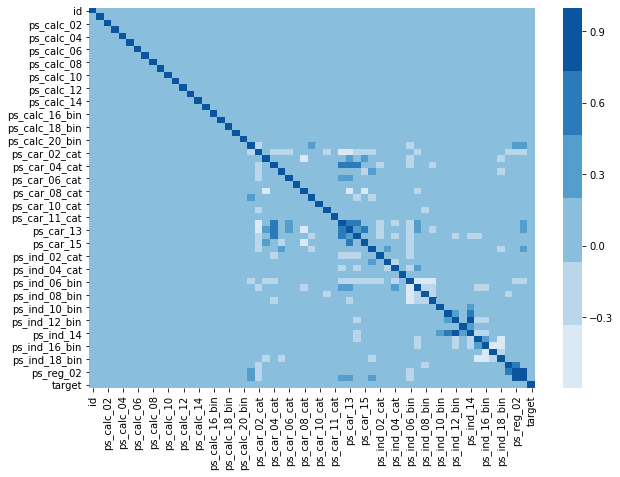

In [15]:
# 전체 변수에 대한 상관관계 heatmap 시각화
corr = df.corr()  # 전체변수

cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, cmap=cmap)


# 전체 변수 결과, 대부분의 변수들이 상관관계가 매우 낮음을 확인할 수 있다.

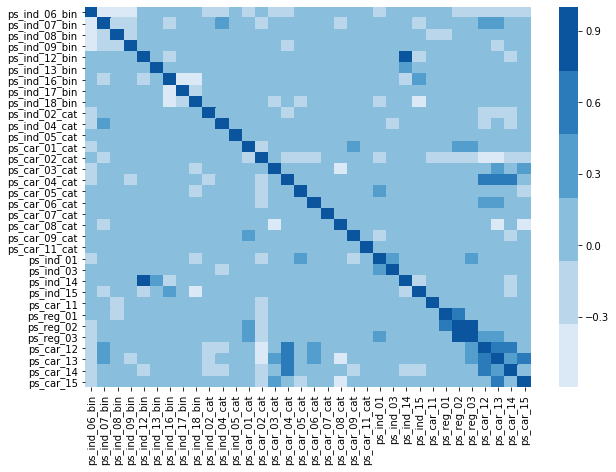

In [16]:
# 일부 변수만 선별
features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 
          'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
          'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 
          'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 
          'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
          'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
          'ps_car_14', 'ps_car_15']

# 일부 변수에 대한 상관관계 heatmap 그래프 시각화
corr_sub = df[features].corr()    # 뽑아낸 일부 변수를 이곳에 입력
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)


# 일부 변수를 선별하여 상관관계 그래프 결과, ps_ind_14와 ps_ind_12_bin의 관계가 0.89로 매우 높은 것을 볼수있다(픽셀이 굉장히 진한 것)
# 그 외 일부 변수는 0.5~0.6 수준의 상관관계를 가진다.

## 상관관계 분석 결과, 주최자의 섬세한 전처리 과정으로 인해 정보력이 아예없는 상수 값, 혹은 0.95 이상의 높은 상관관계를 가지는 중복 변수등은 존재하지 않는다.

### 일반적으로 0.95 이상의 상관관계를 가질 경우, 변수 하나를 제거한다. 이번 경우엔 최고 0.89 이므로 별도로 제거할 필요 없다.

# ★★★★★ 단일 변수의 고유값별로 'target' 변수의 비율을 시각화 (각 변수가 target과의 관계 비율 확인) ★★★★★
 -> 변수 예측 능력의 통계적 유효성을 확인하기 위하여, 변수의 고유값별로 95%의 신뢰구간을 함께 시각화 (전체 데이터 기준 타겟 변수의 비율은 3.6%)

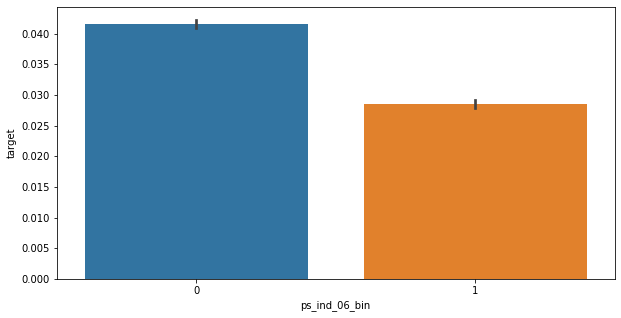

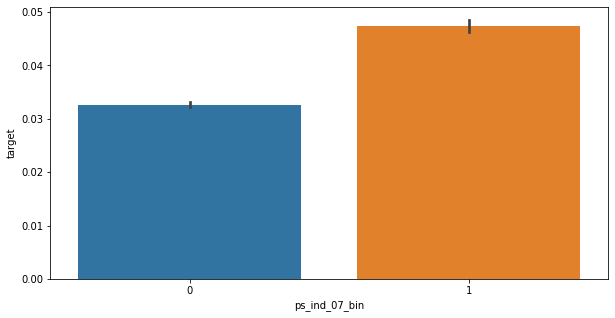

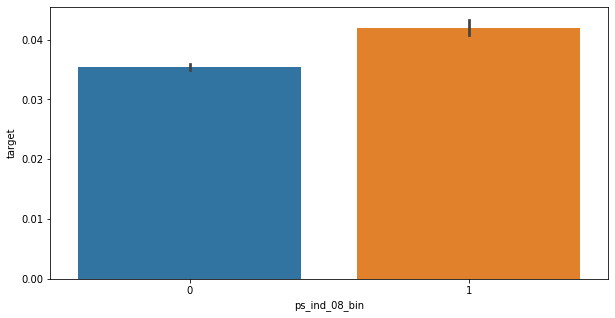

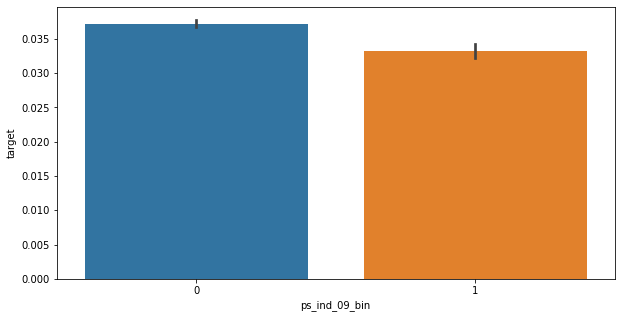

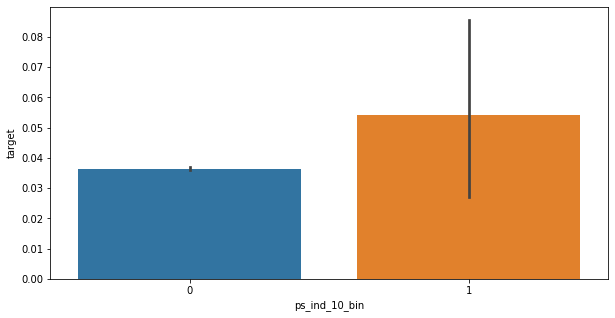

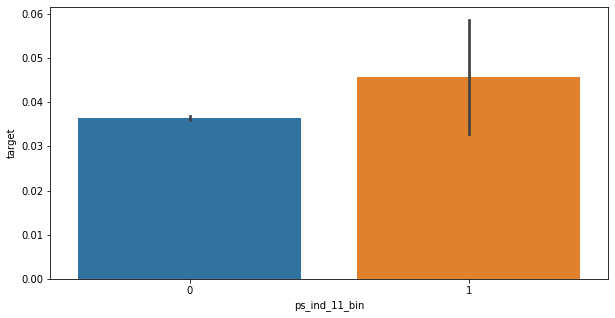

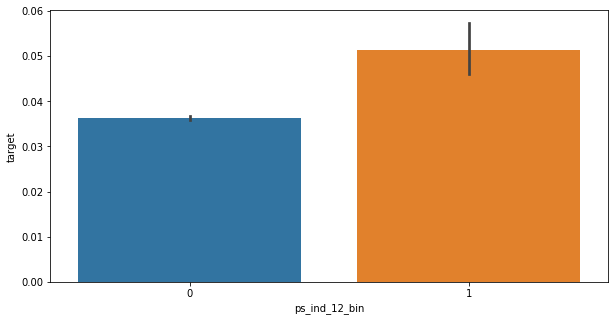

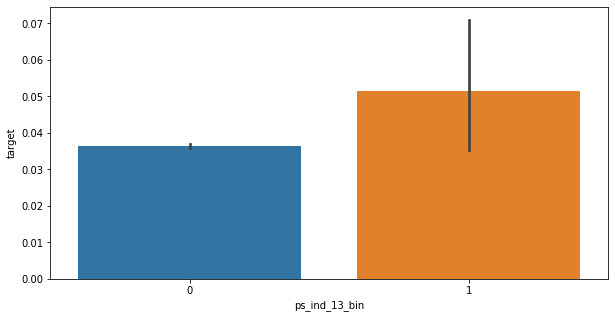

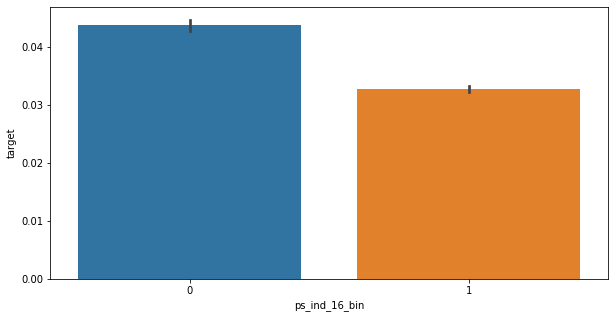

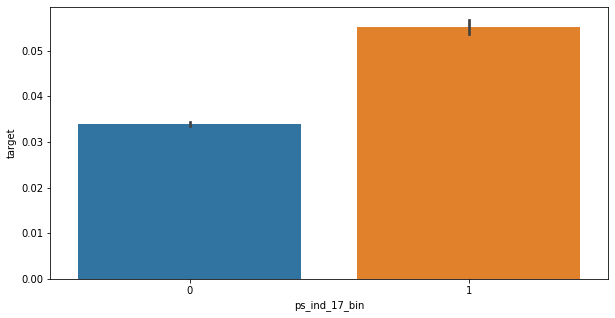

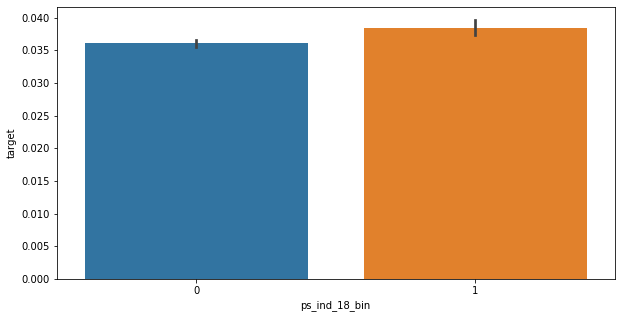

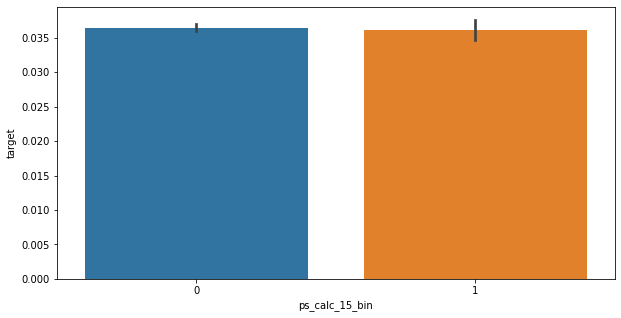

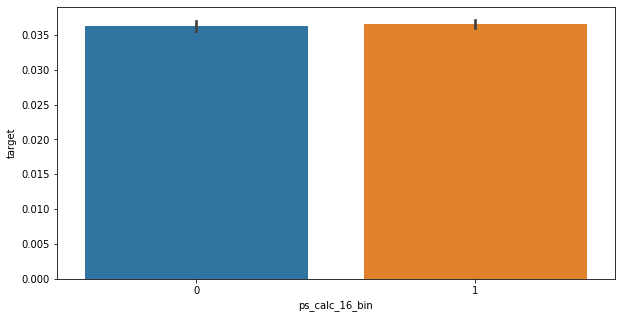

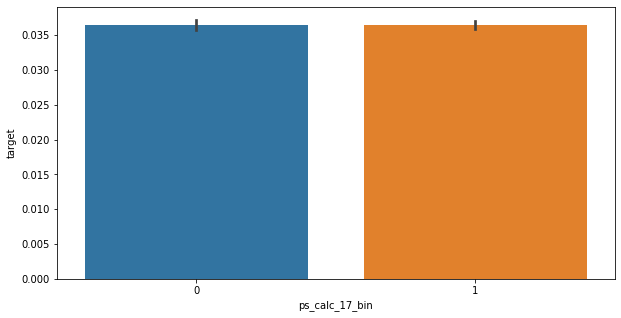

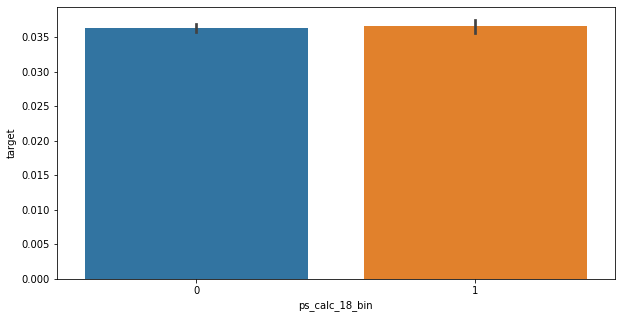

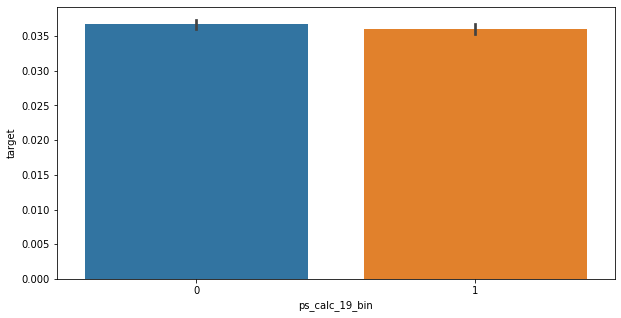

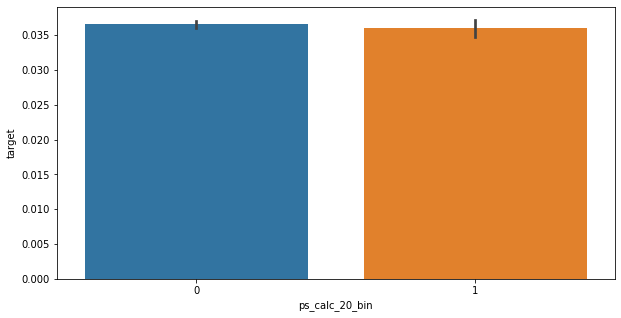

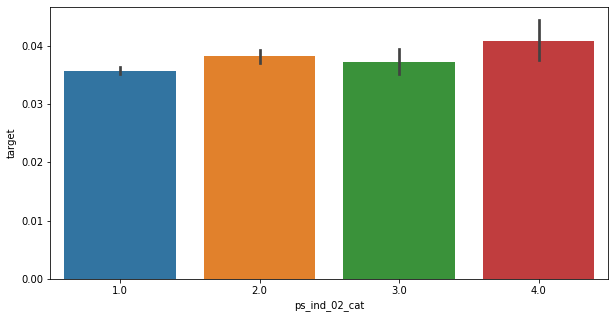

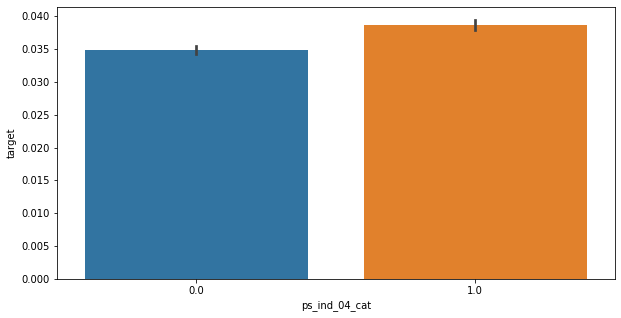

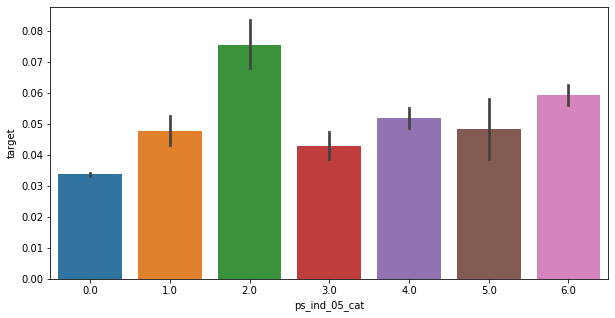

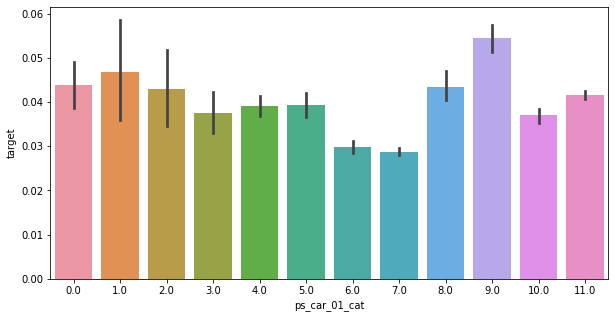

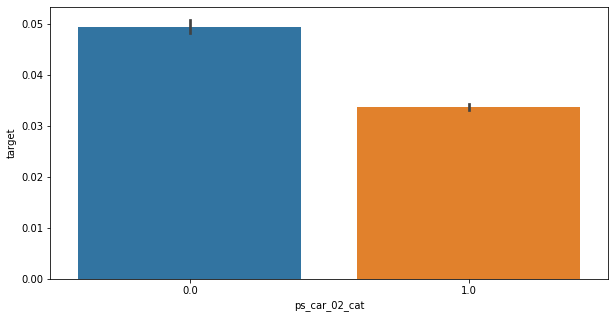

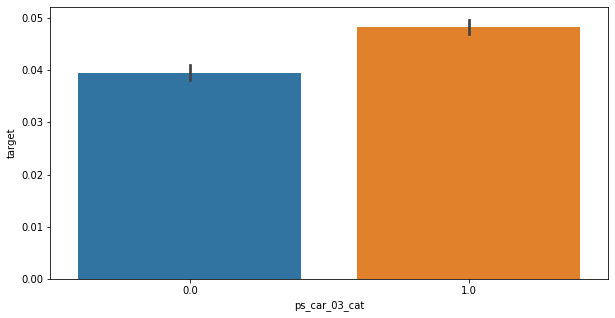

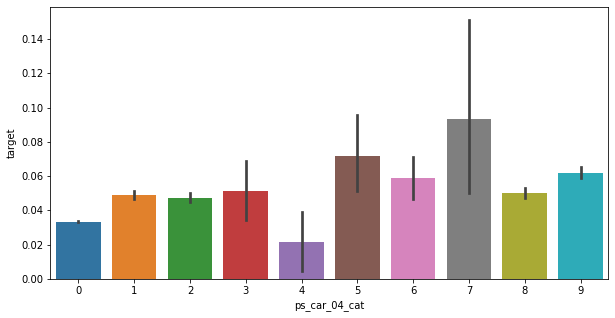

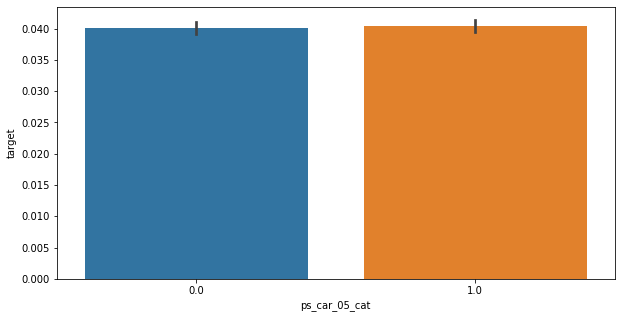

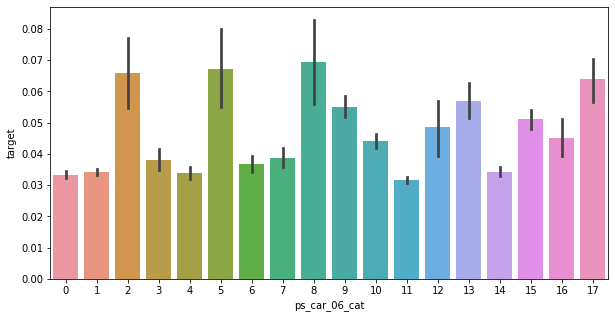

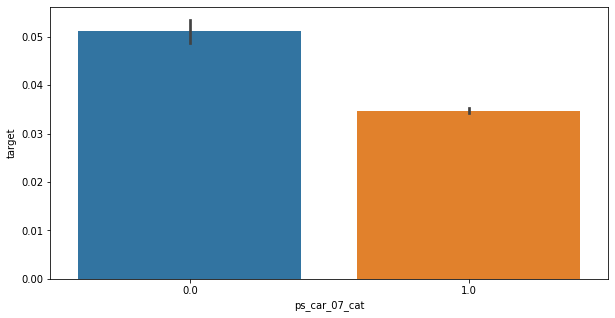

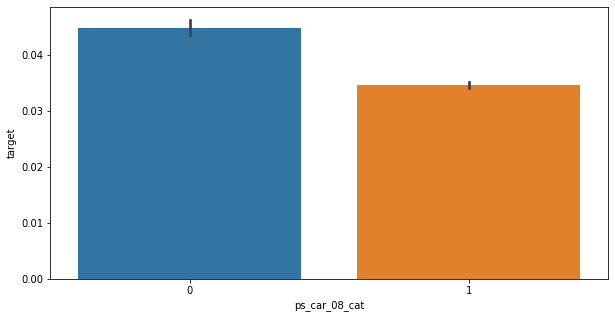

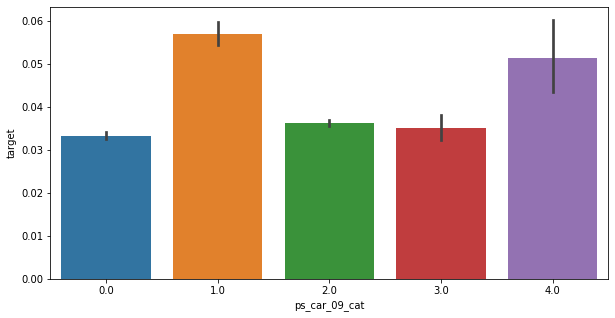

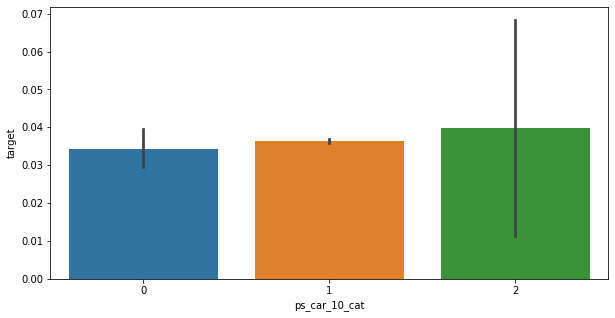

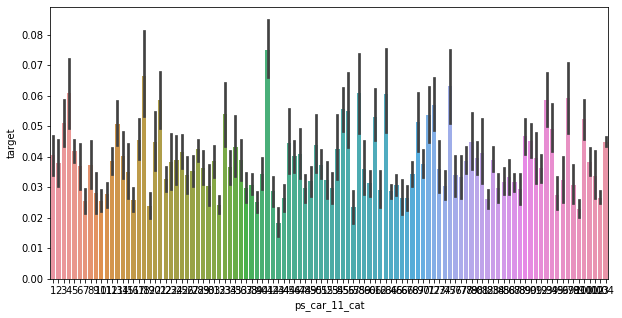

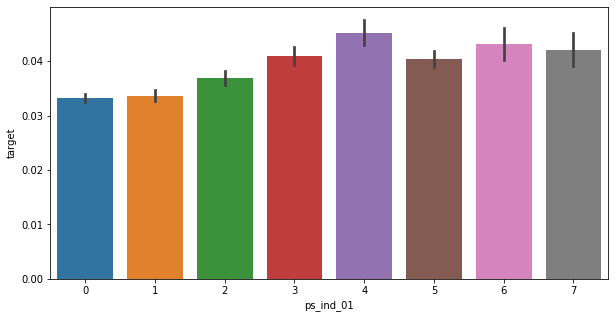

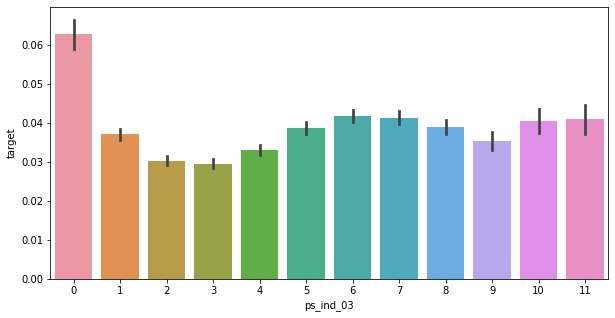

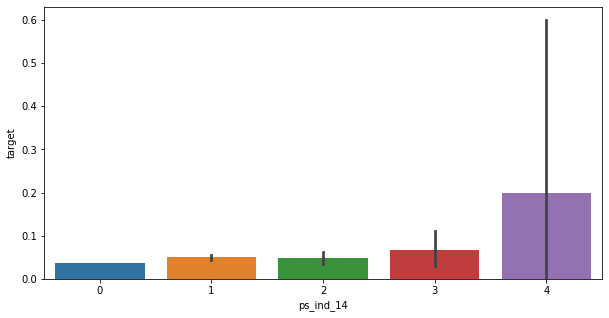

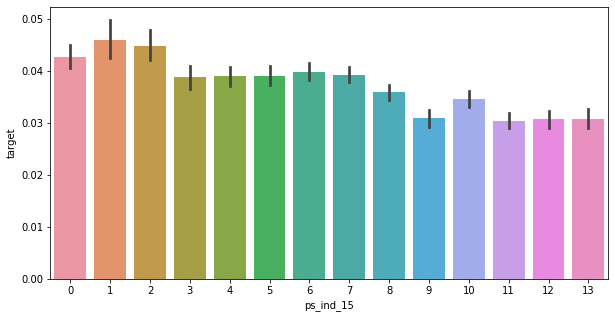

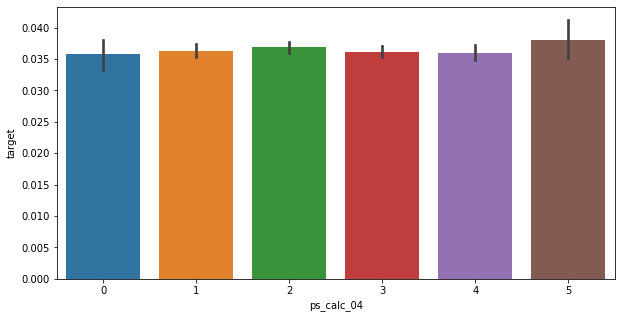

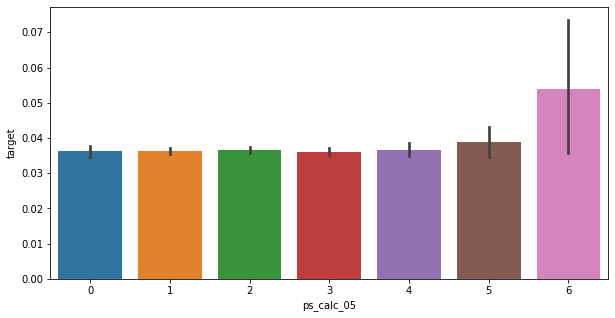

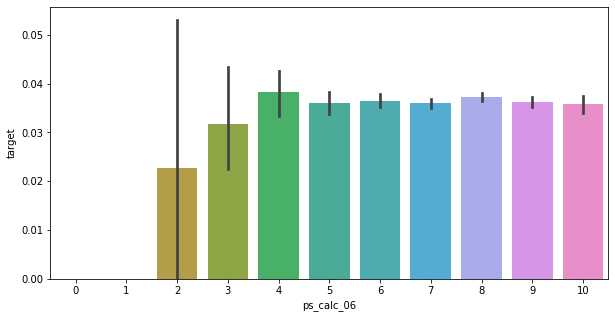

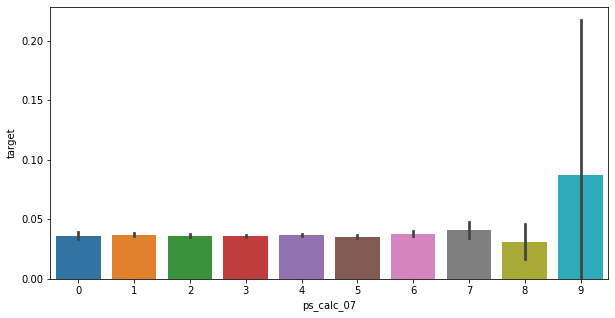

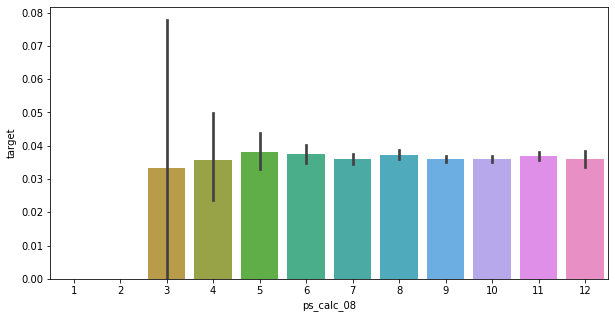

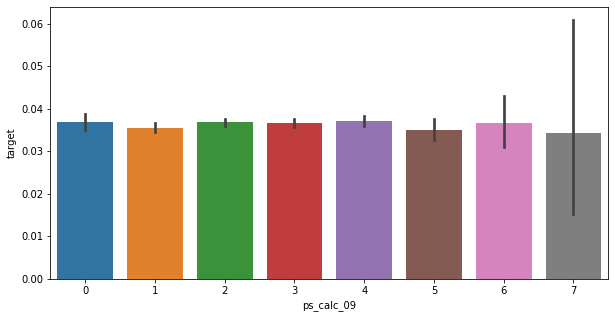

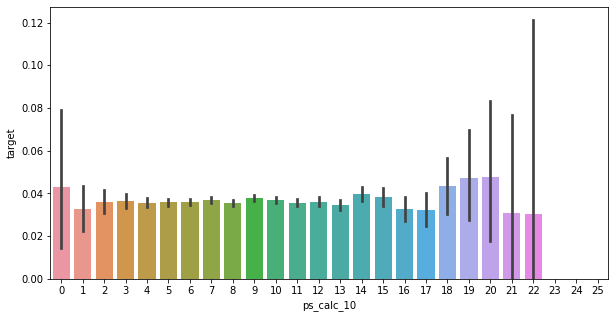

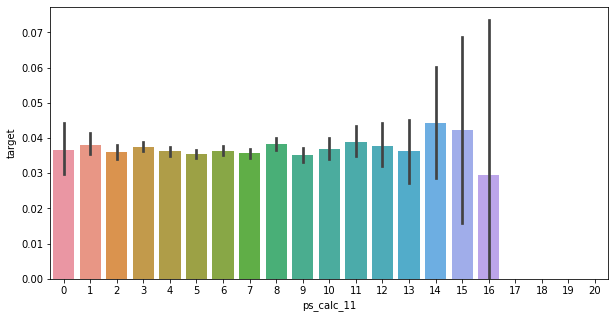

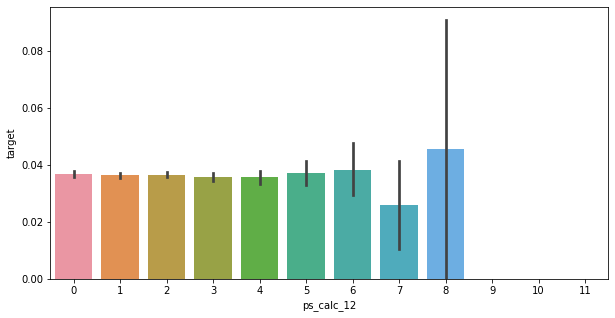

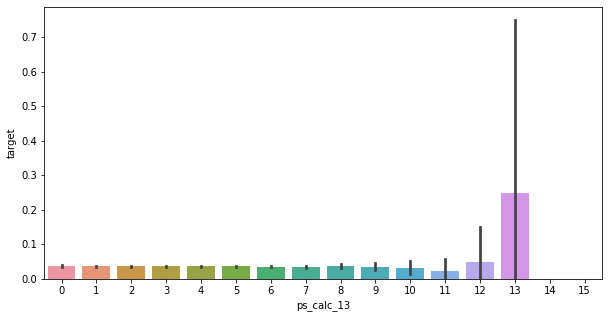

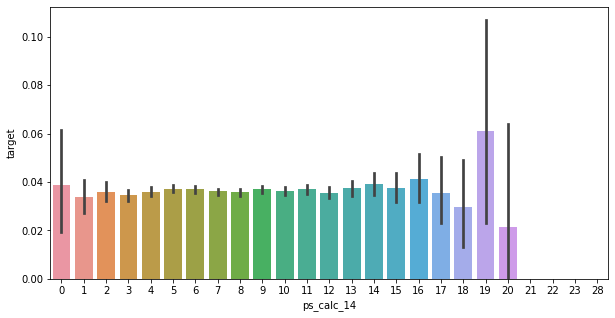

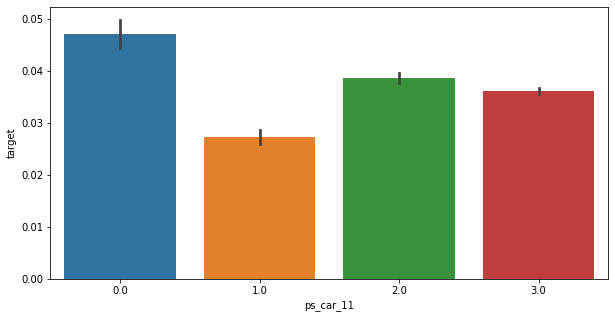

In [17]:
def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=col, y='target', data=data)  # y=target으로 입력한 것이 중요
    plt.show()
    
# 1) 이진변수, 2) 범주형변수, 3) 정수형변수 시각화
for col in binary + category + integer:
    bar_plot_ci(col, df)
    
# 이 행위를 통해 어떤 변수들이 타겟 변수 예측 능력이 있을지 간단하게 분석 가능하며, 이는 파생 변수 생성 및 추후 모델 분석에 유의미한 정보이다.

### ps_ind_16_bin, 06_bin 두 변수는 이진 변수의 값에 따라 타겟 변수의 비율이 다르다. (유용)
#### ps_ind_11_bin은 평균값 기준으로는 타겟 변수의 비율이 유의미하게 달라보이지만, 검정직선 신뢰구간이너무 넓어 유효하지 않다.
 -> ps_cals_18_bin 역시 평균 타겟 비율에서 큰 차이를 찾기 어려워서, 변수로써의 예측 능력이 낮다.
    
### ps_car_01_cat은 일부에선 신뢰구간이 넓어 변수로써 예측 능력이 월등하지 않지만, 최소한 6.0, 7.0에선 통계적으로 유의미 (유용)
### ps_car_11_cat은 104개 고유값이 0.02~0.08 큰 범위의 타겟 비율 (유용)
#### ps_car_05_cat, ps_ind_02_cat은 통계적으로 유효한 차이를 찾기 어렵다 (차이를 찾기 어려움)
#### ps_calc_06, 07 에서도 특정 값에서의 타겟 비율의 95% 신뢰구간이 너무 넓다.

### ps_ind_01, ps_ind_03 은 고유값별로 신뢰구간이 군집화되는 것으로 봐서 어느정도 예측 능력이 있다 (유용)

### 57개 변수 중, 단일 변수 기준으로 유의미한 예측 능력을 보유하고 있는 변수들은 다음이다. 
 -> ps_ind_06,07,08,09_bin / ps_ind_12,16,17,18_bin / ps_ind_04,05_cat / ps_car_01,02,03,04,06,07,08,09,11_cat / ps_ind_01,03,15 / ps_car_11
    총 23개)

## 훈련 데이터 개수 vs 테스트 데이터 개수 비교.
 -> 두 데이터의 분포가 심각하게 다를 경우, 훈련 데이터에서 학습한 내용은 무용지물이 된다. 해당 데이터 셋에서는 테스트 데이터가 약 1.5배 많으니, 그래프상으로 훈련 데이터보다 1.5배 정도 높게 나타나면 데이터 량의 유사도를 가진다고 판단할 수 있다.

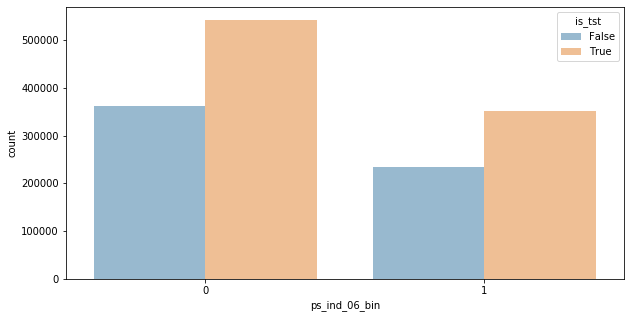

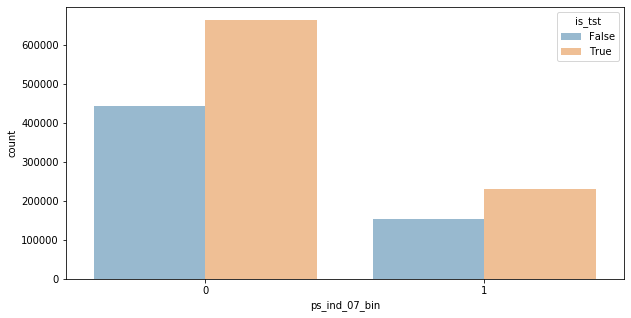

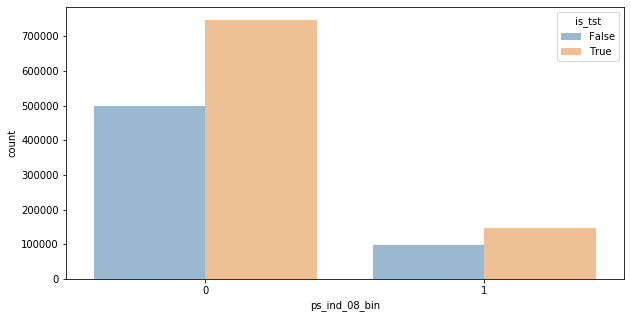

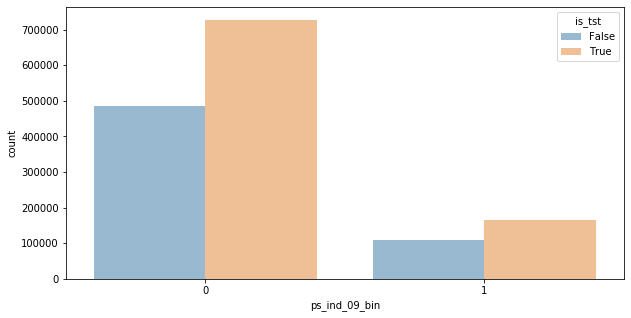

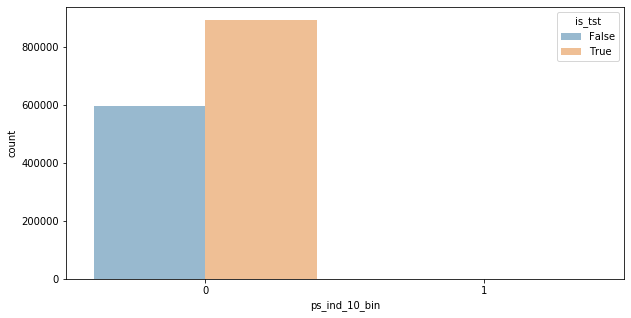

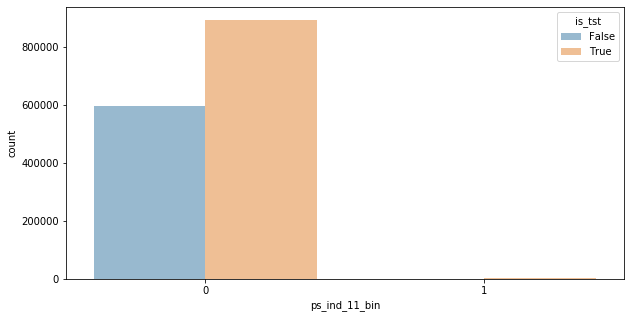

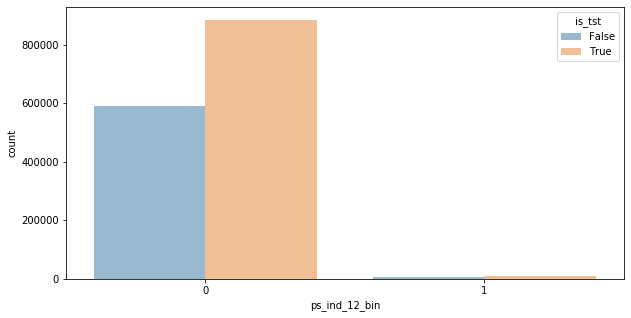

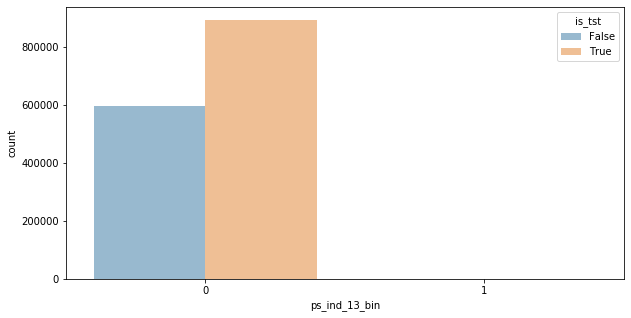

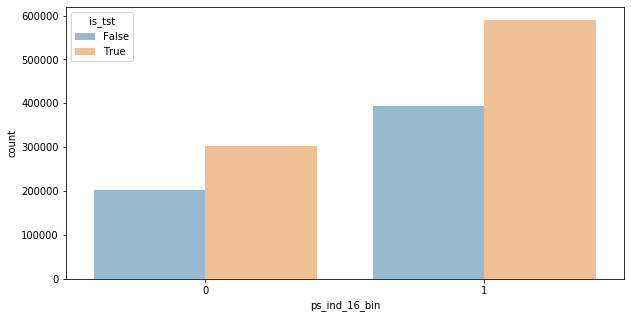

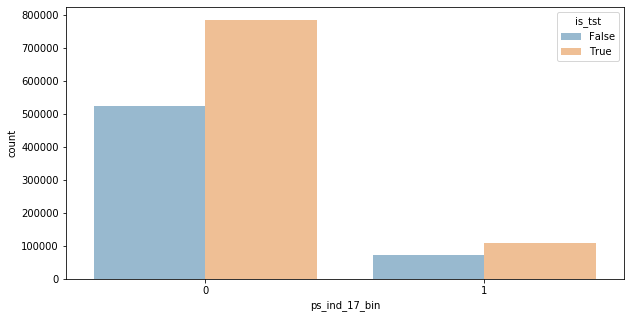

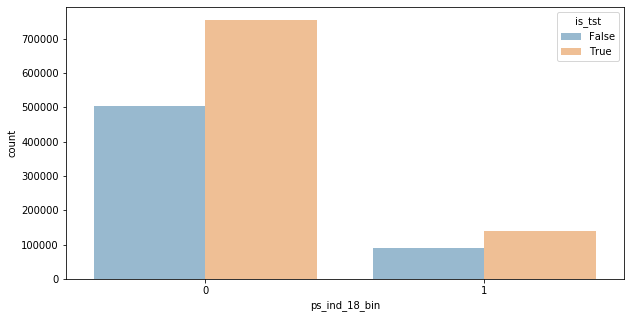

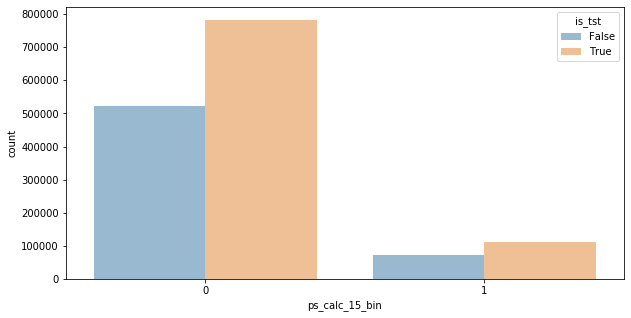

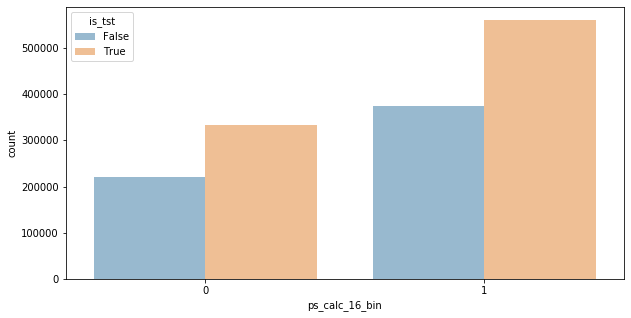

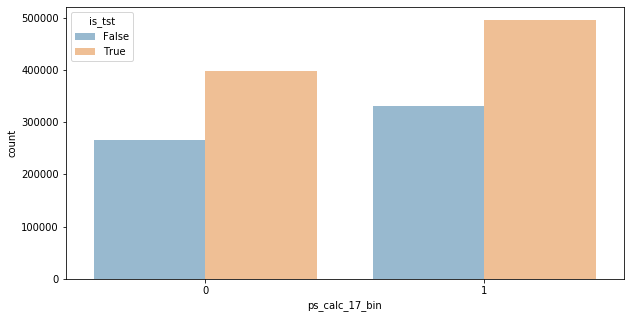

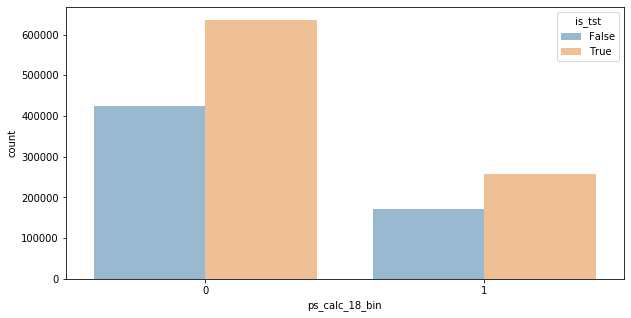

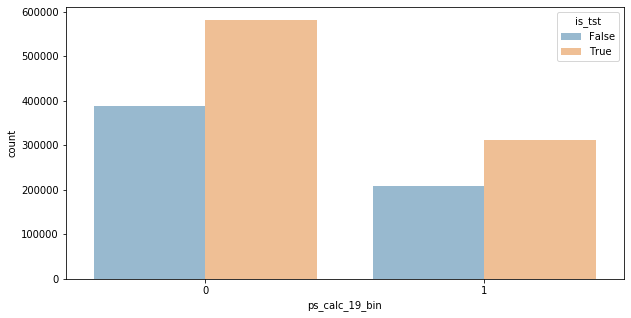

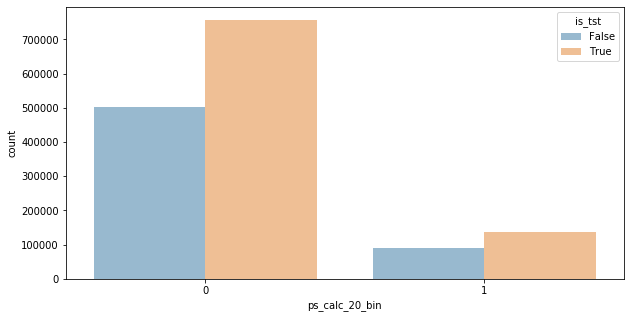

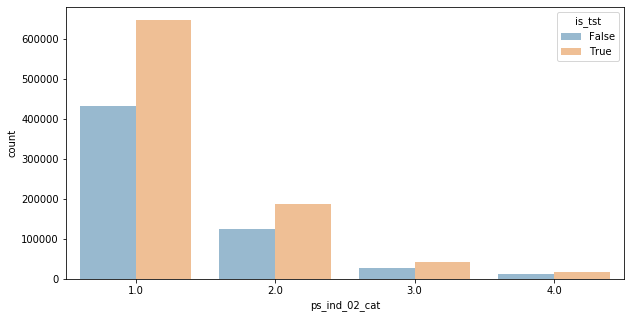

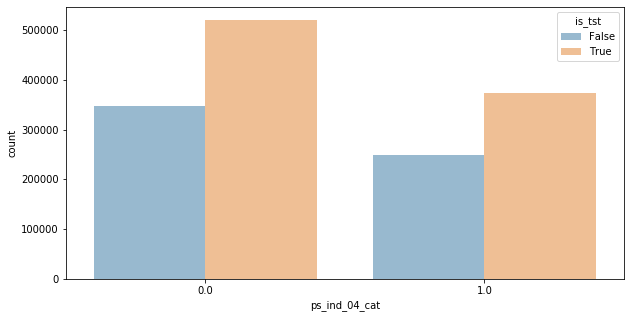

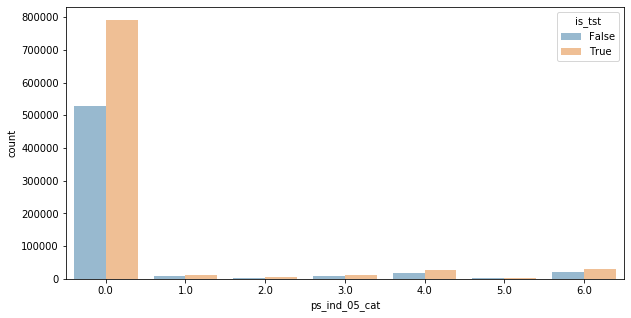

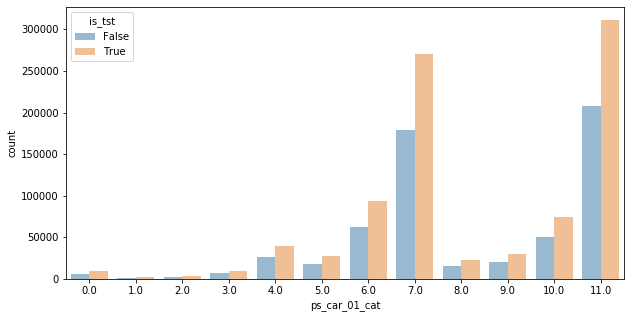

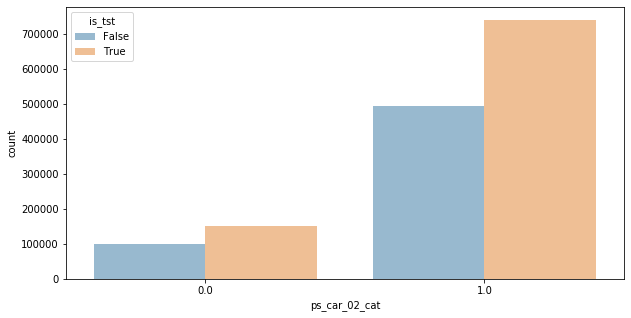

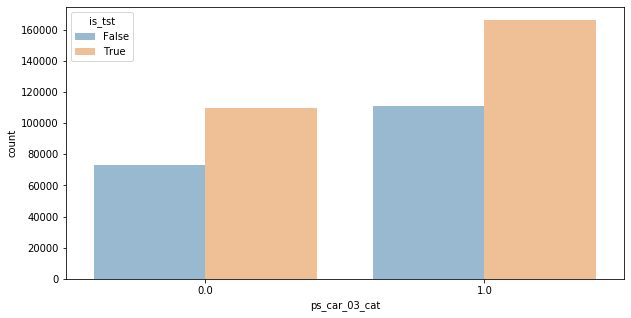

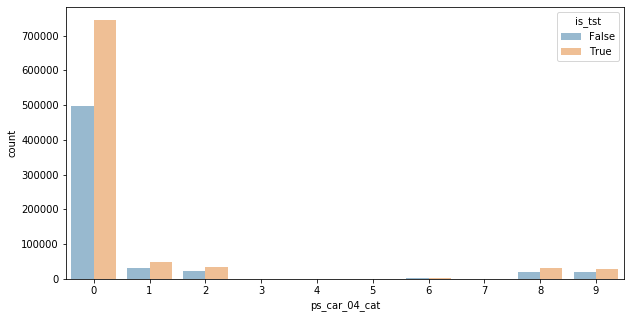

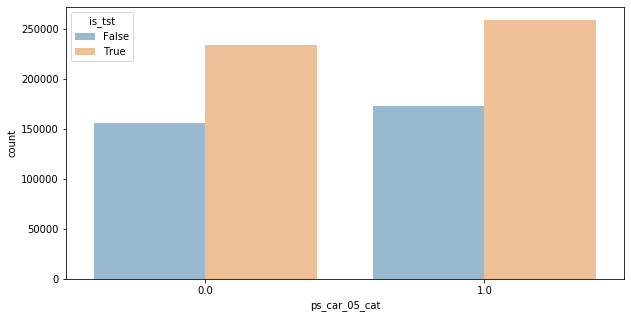

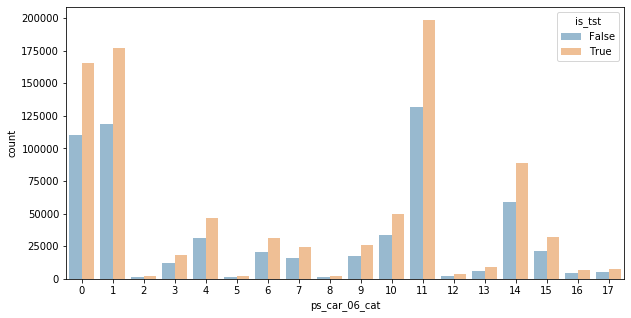

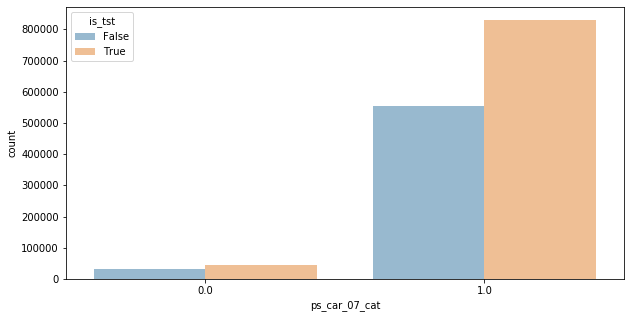

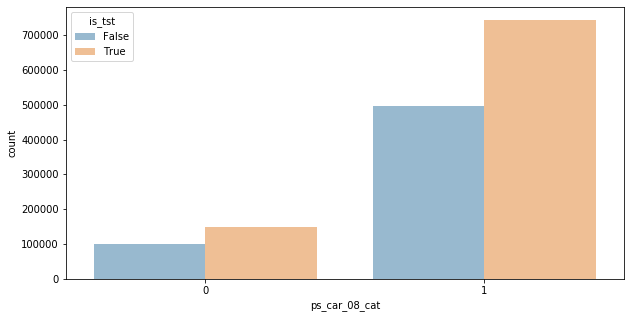

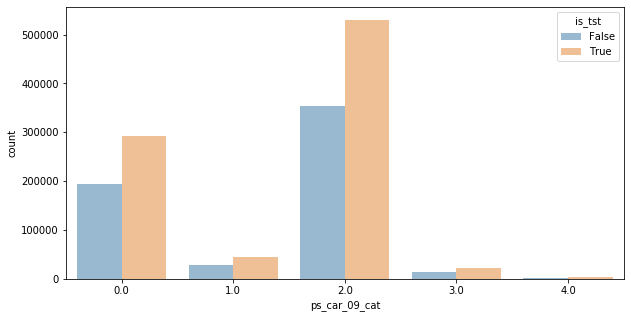

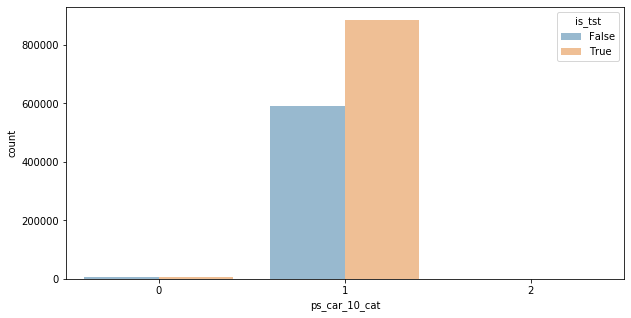

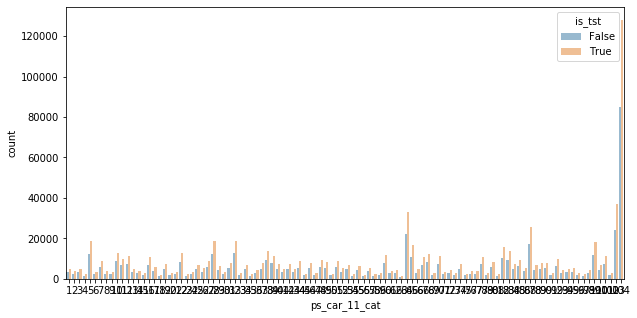

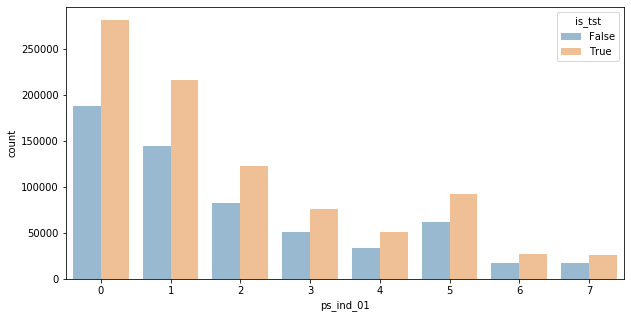

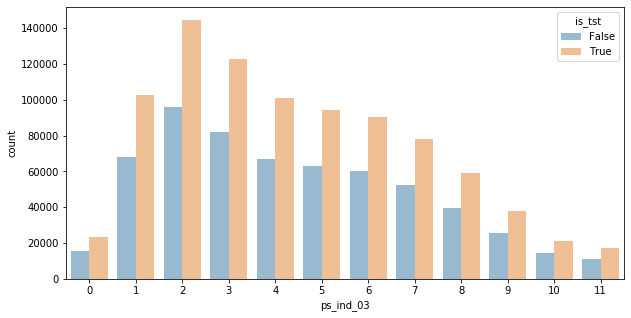

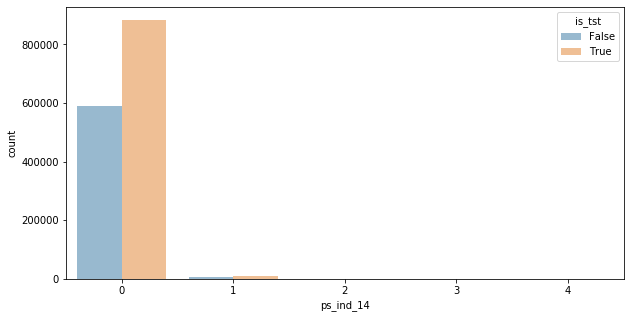

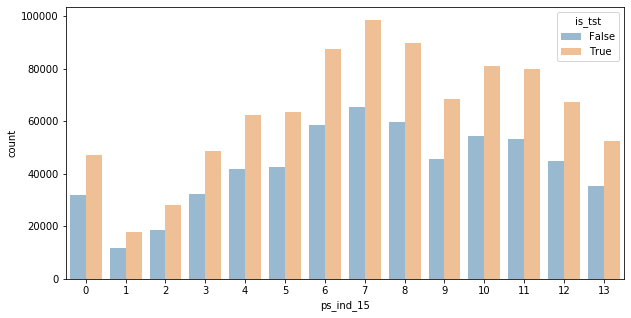

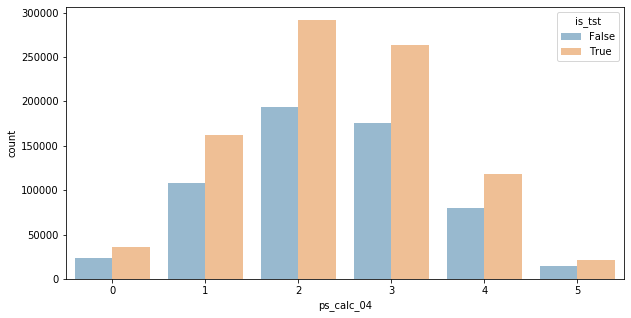

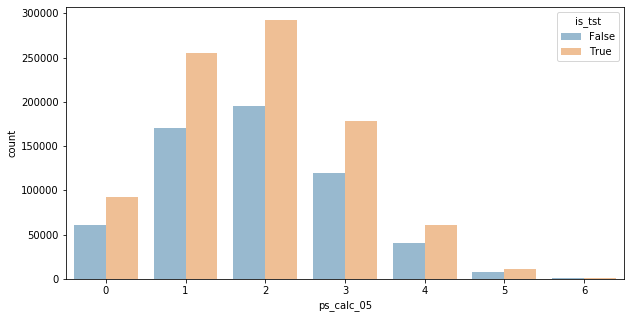

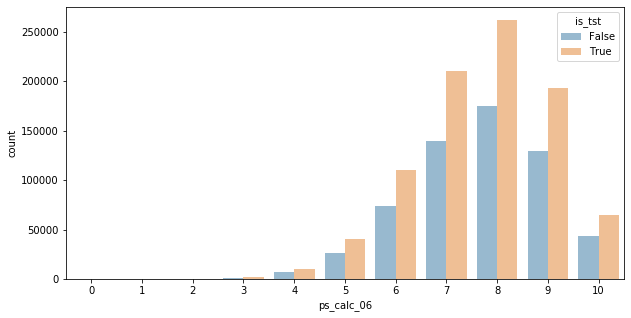

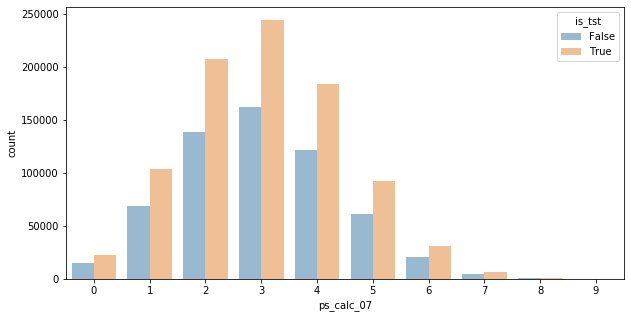

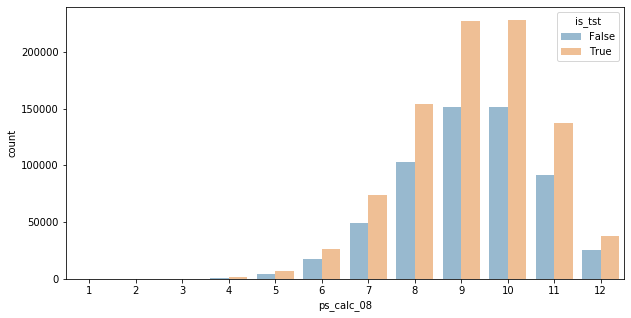

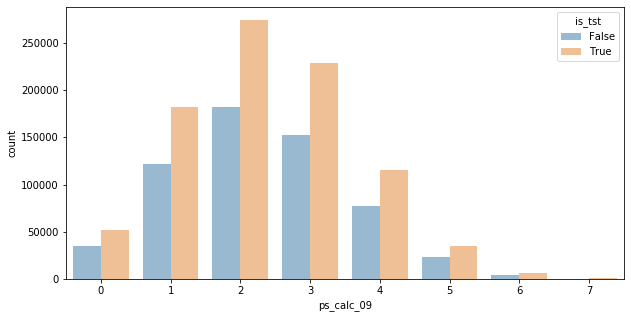

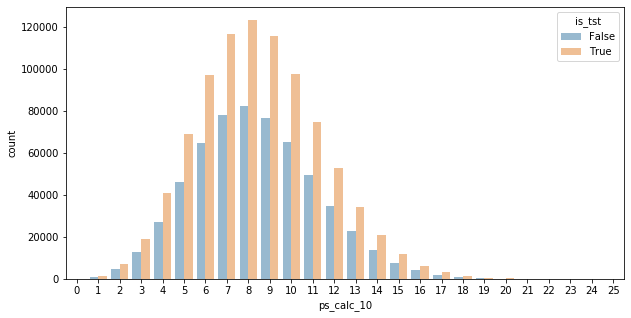

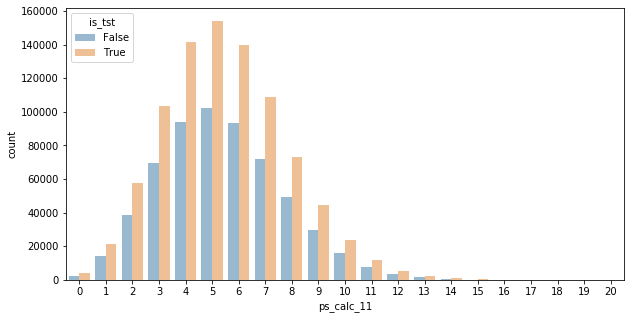

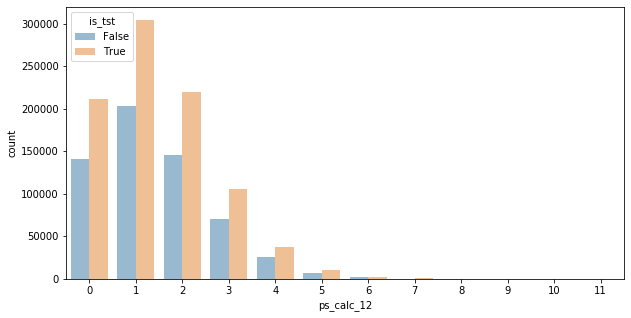

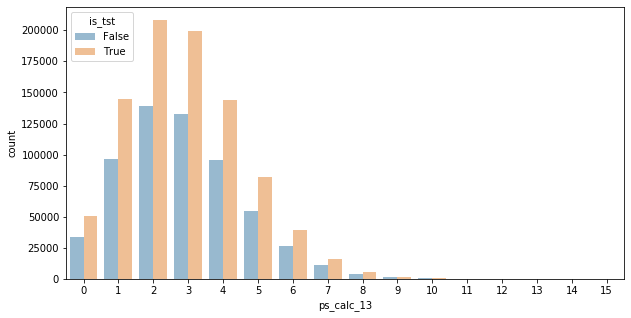

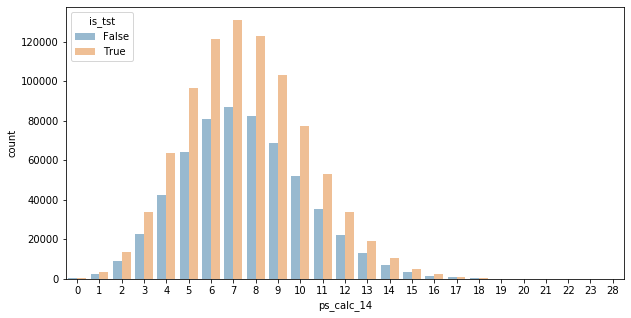

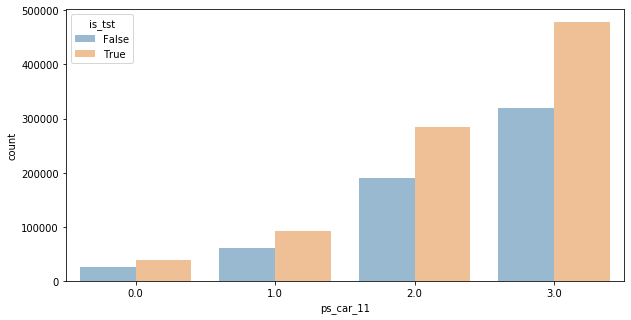

In [19]:
# 테스트 데이터를 구별하기 위한 'is_tst' 변수 생성
df['is_tst'] = df['target'].isnull()  # 'target'변수는 없으므로 null 처리

# 1) 이진변수, 2) 범주형변수, 3) 정수형변수 시각화
for col in binary + category + integer:
    bar_plot(col, df, 'is_tst')